# Importing Libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score, precision_recall_curve
from imblearn.over_sampling import SMOTE

import warnings 
warnings.filterwarnings("ignore")

# Loading Data

In [2]:
df = pd.read_csv("lung cancer survey.csv")

In [3]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [4]:
df.shape

(309, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [6]:
df.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


### Finding Null Values

In [7]:
df.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

### Finding Duplicate values

In [8]:
df.duplicated().sum()

33

In [9]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
304     True
305     True
306     True
307     True
308     True
Length: 309, dtype: bool

# Exploratory data analysis (EDA)

## Univariate Analysis

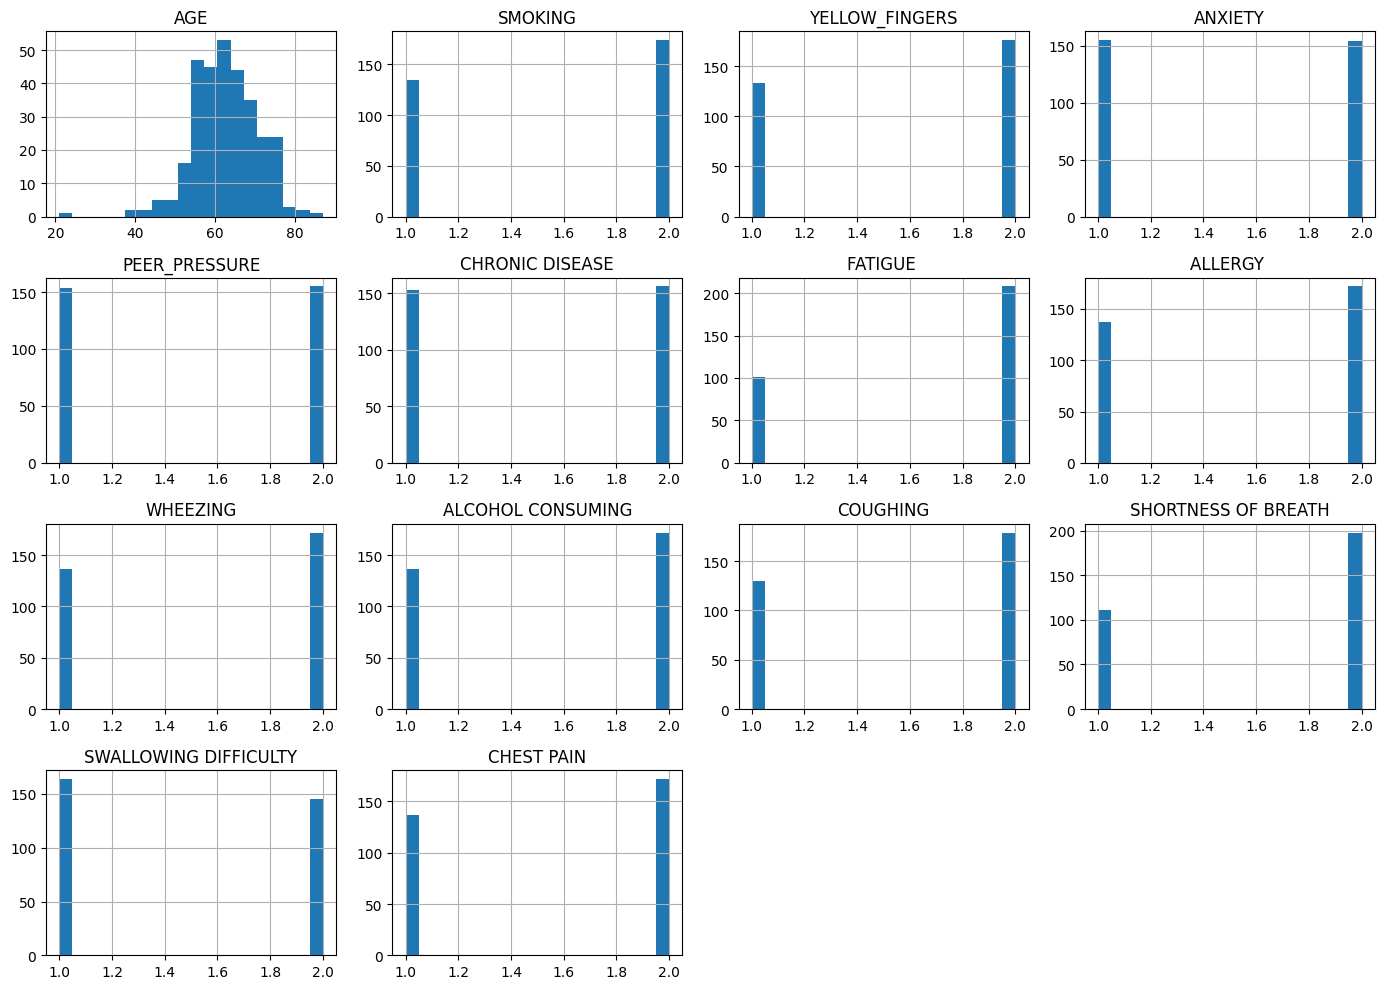

In [10]:
df.hist(bins=20, figsize=(14, 10))
plt.tight_layout()
plt.show()

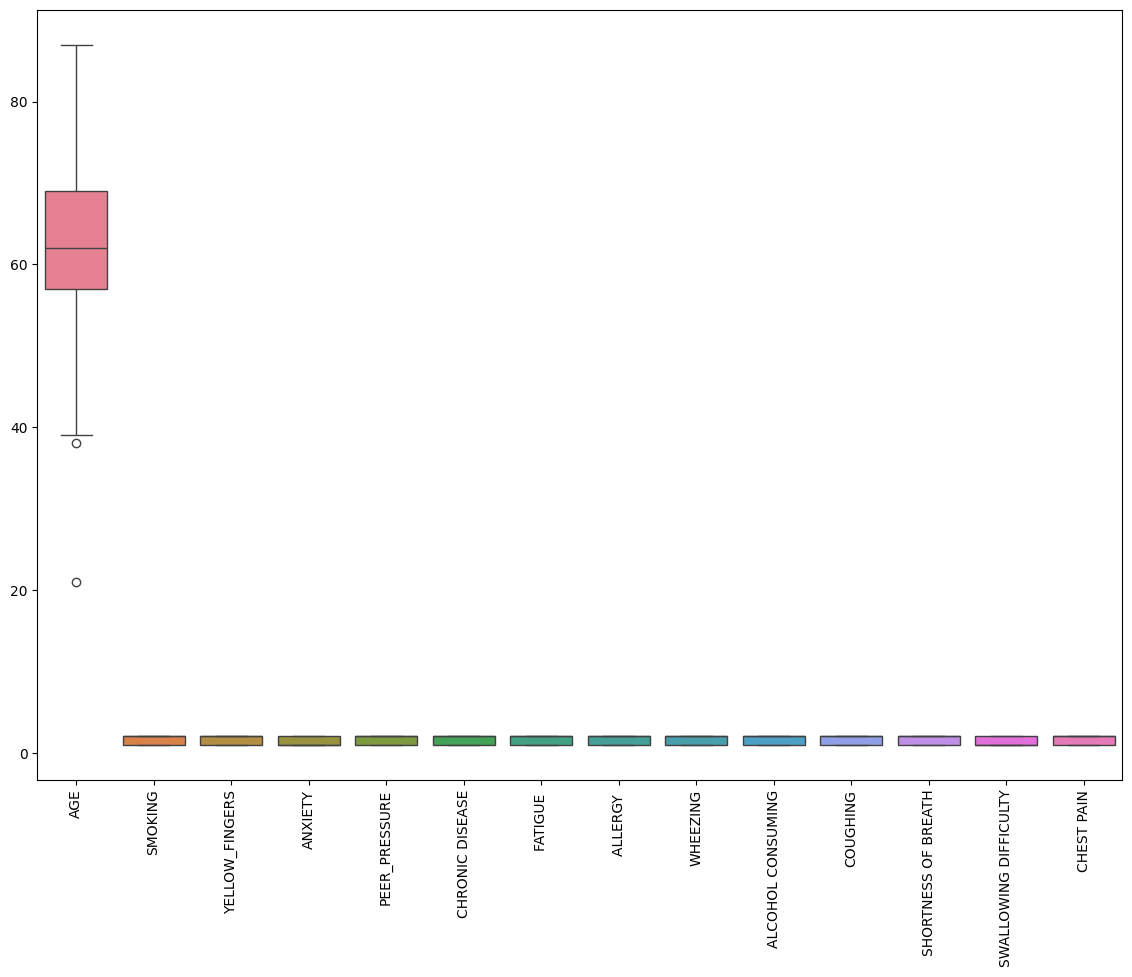

In [11]:
plt.figure(figsize=(14, 10))
sns.boxplot(data=df.select_dtypes(include=[np.number]))
plt.xticks(rotation=90)
plt.show()

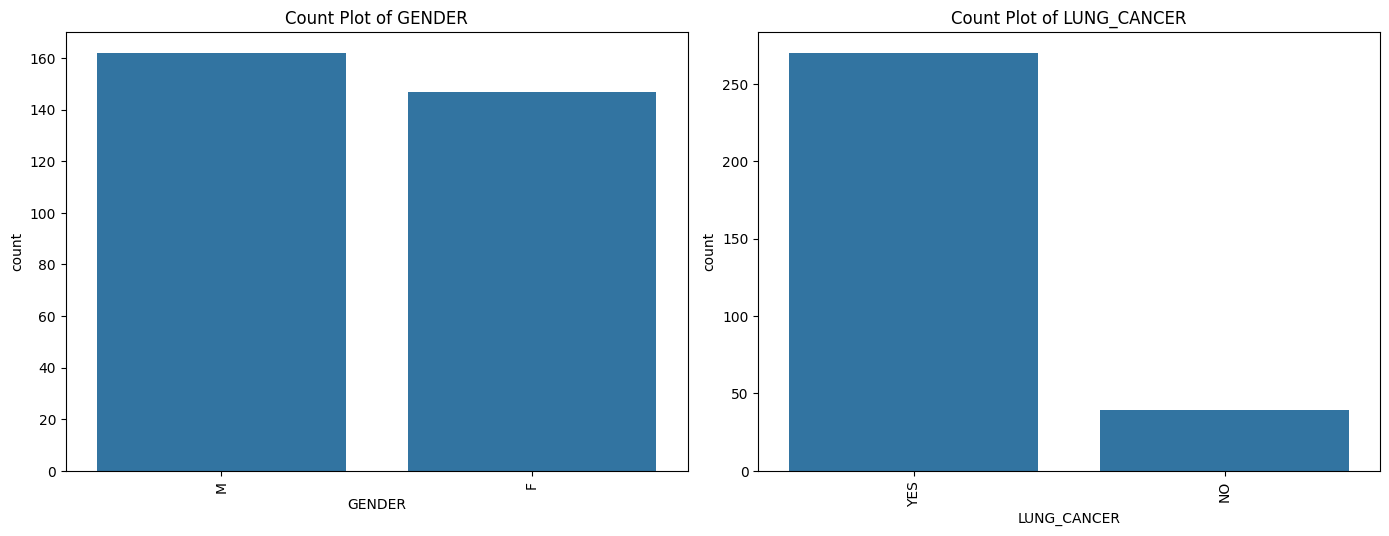

In [12]:
categorical_features = df.select_dtypes(include=[object]).columns

plt.figure(figsize=(14, 10))
for i, feature in enumerate(categorical_features):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=feature, data=df)
    plt.title(f'Count Plot of {feature}')
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Bivariate Analysis

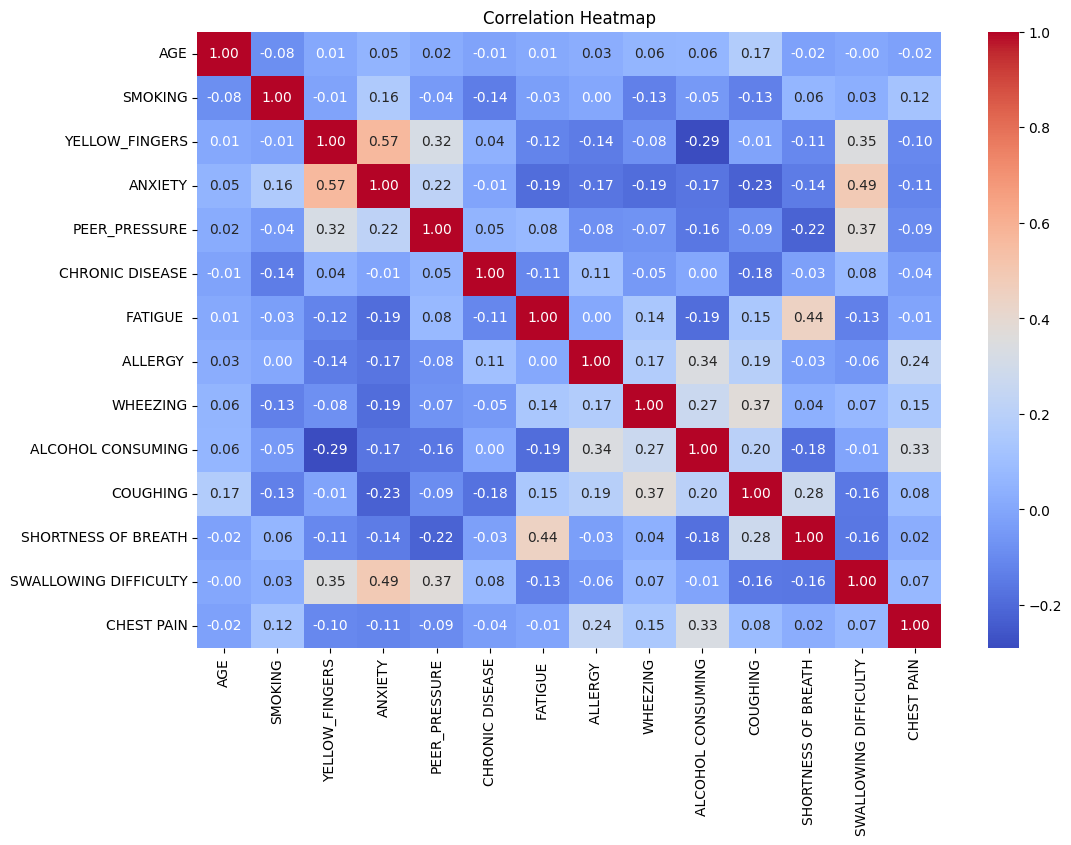

In [13]:
numeric_df = df.select_dtypes(include=['number'])

correlation_matrix = numeric_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

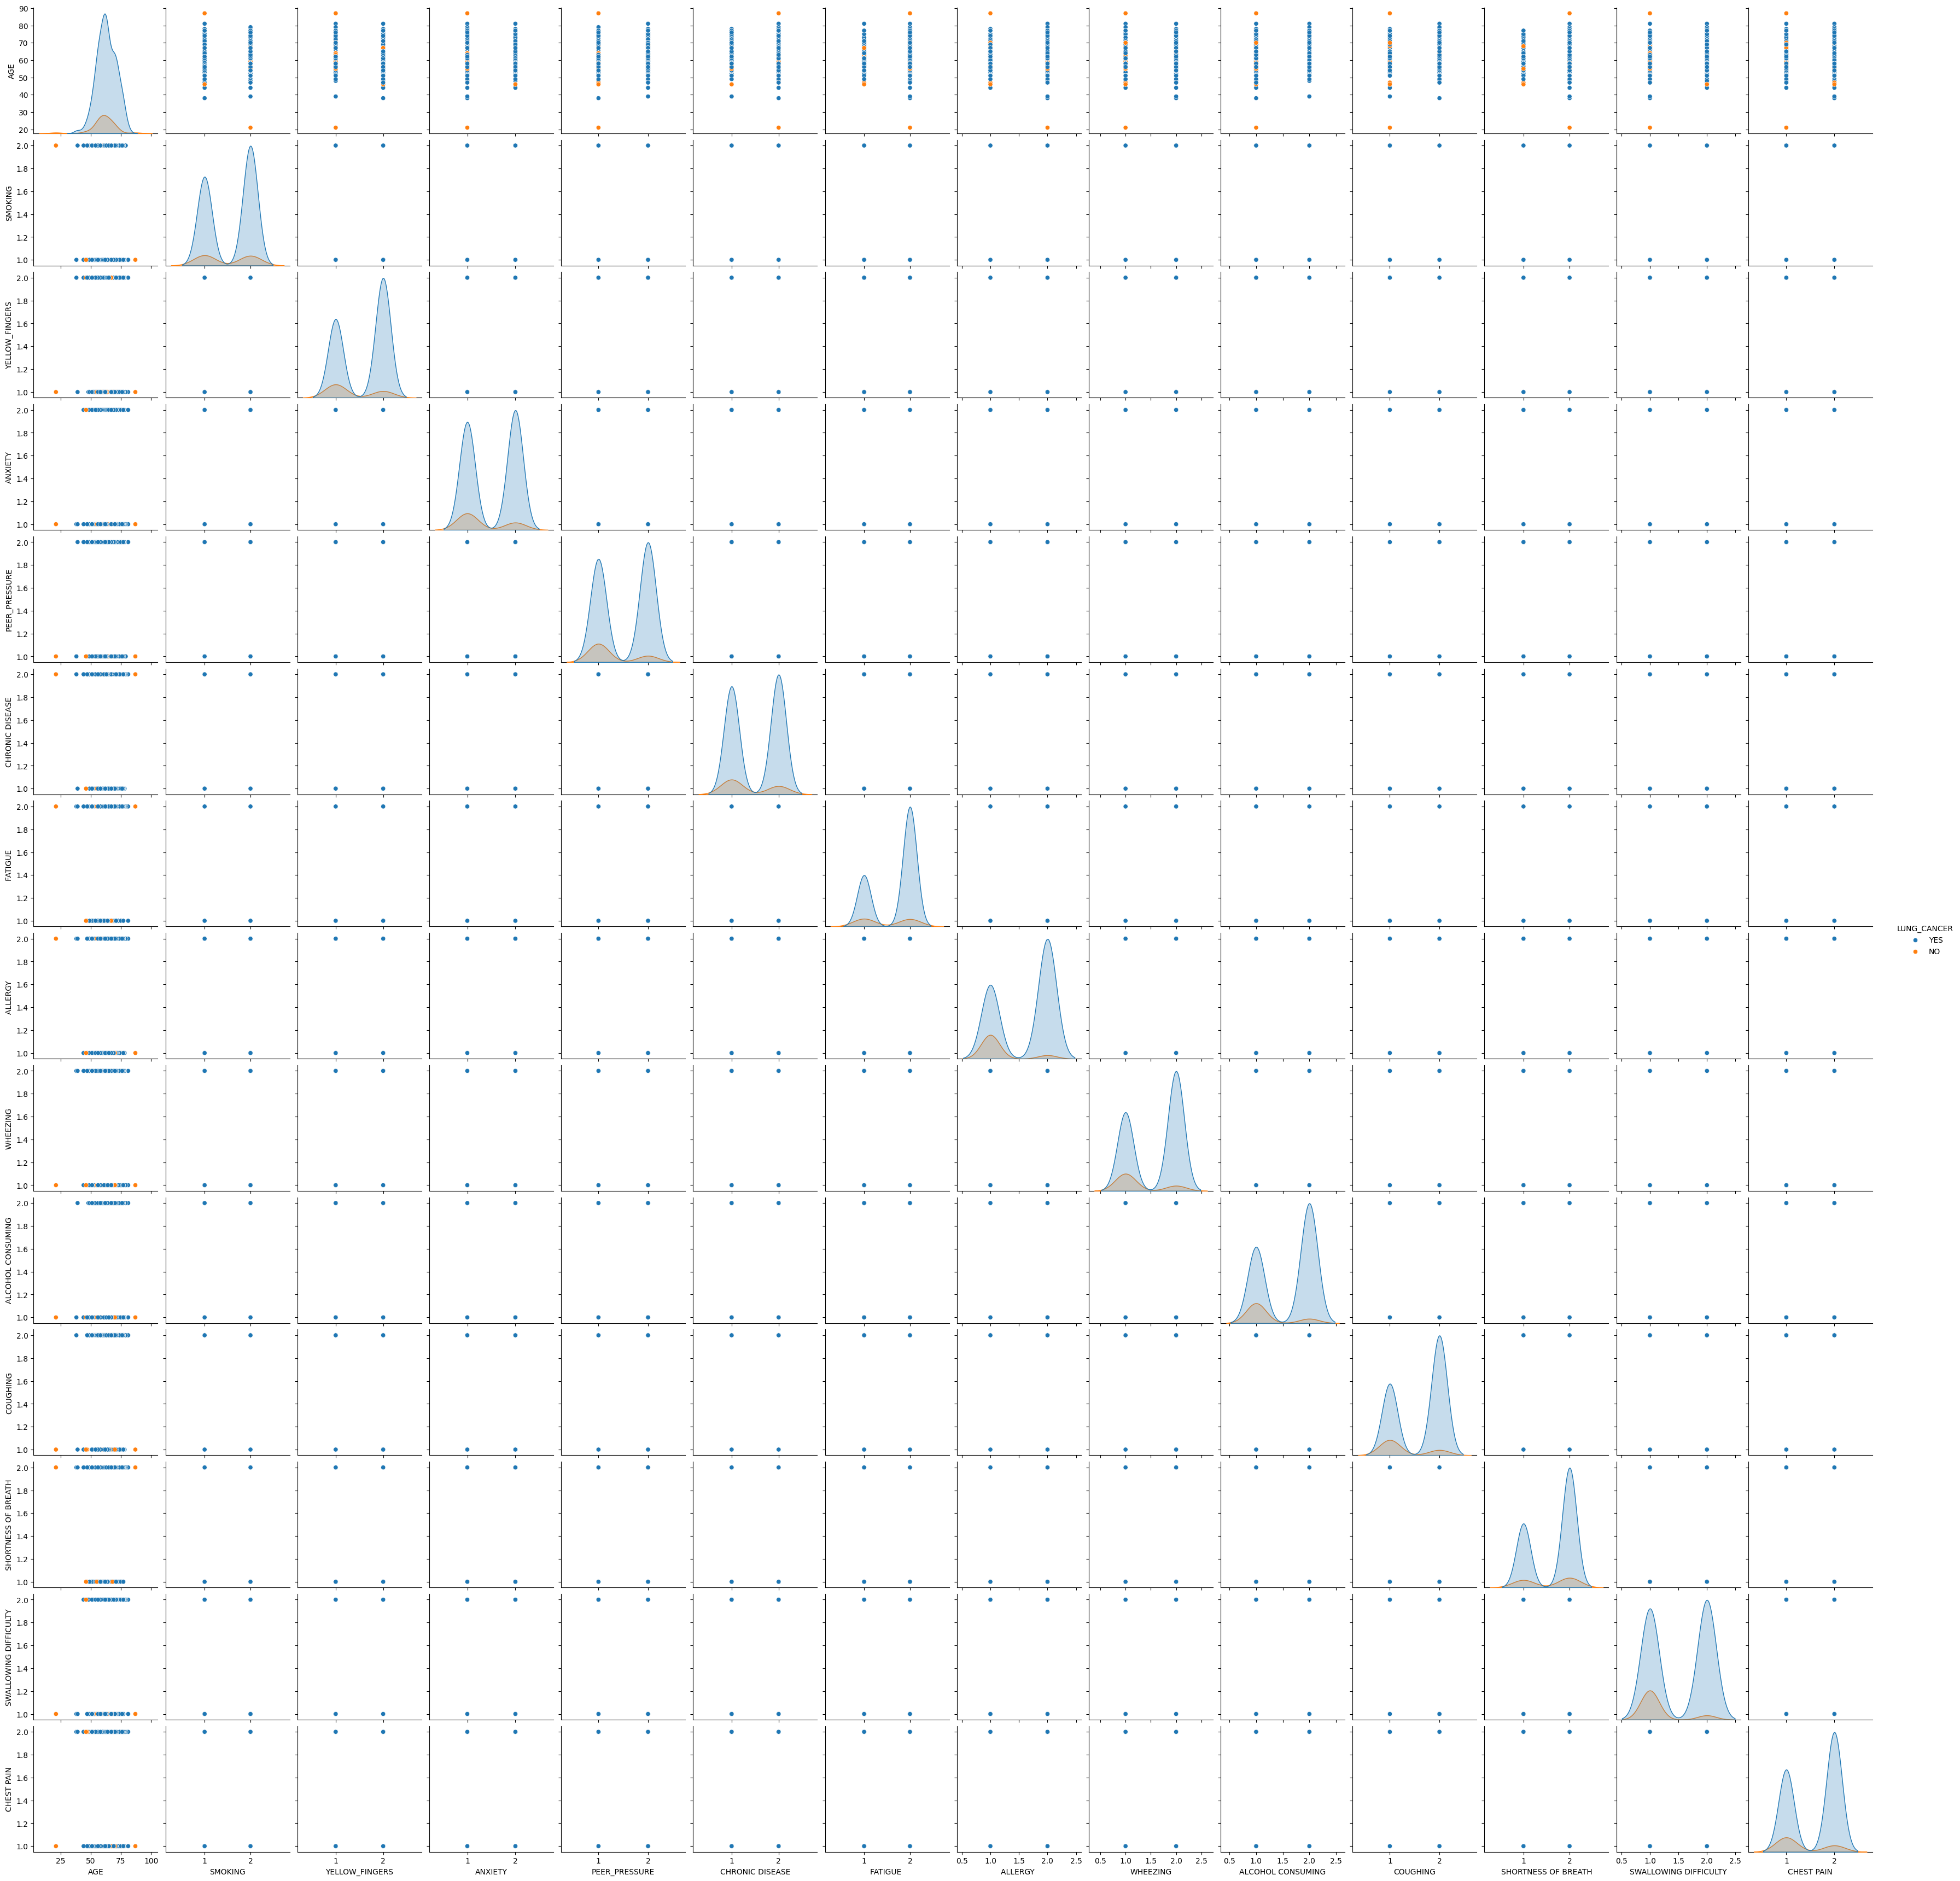

In [14]:
sns.pairplot(df, hue='LUNG_CANCER', diag_kind='kde')
plt.show()

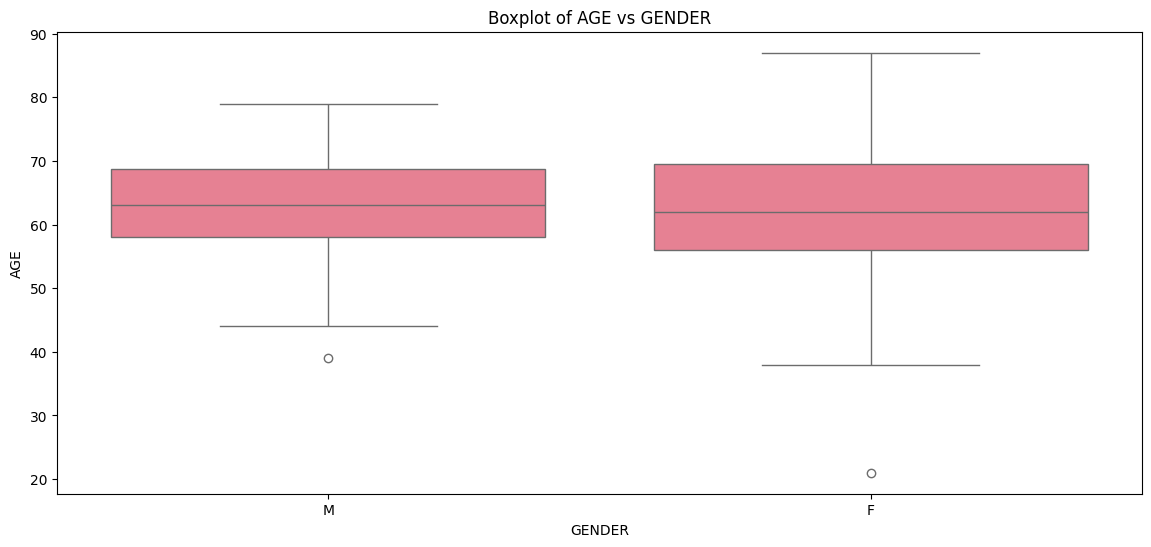

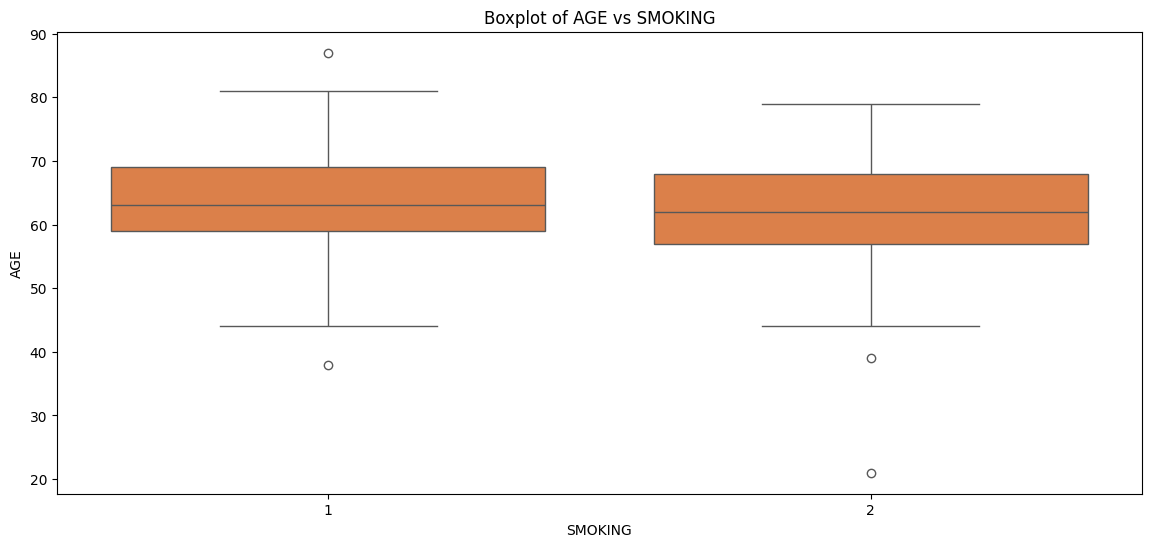

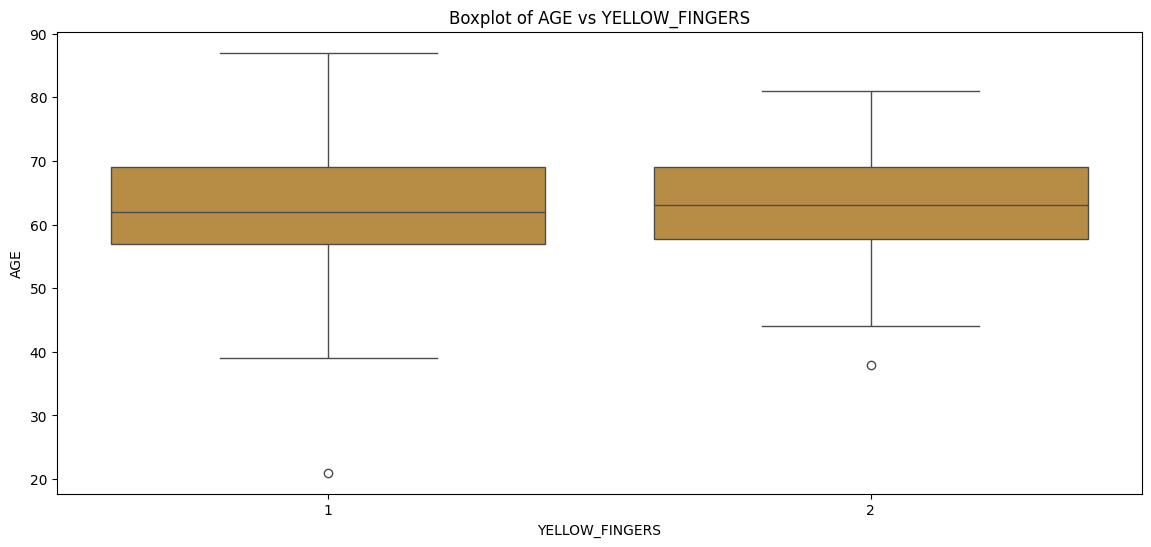

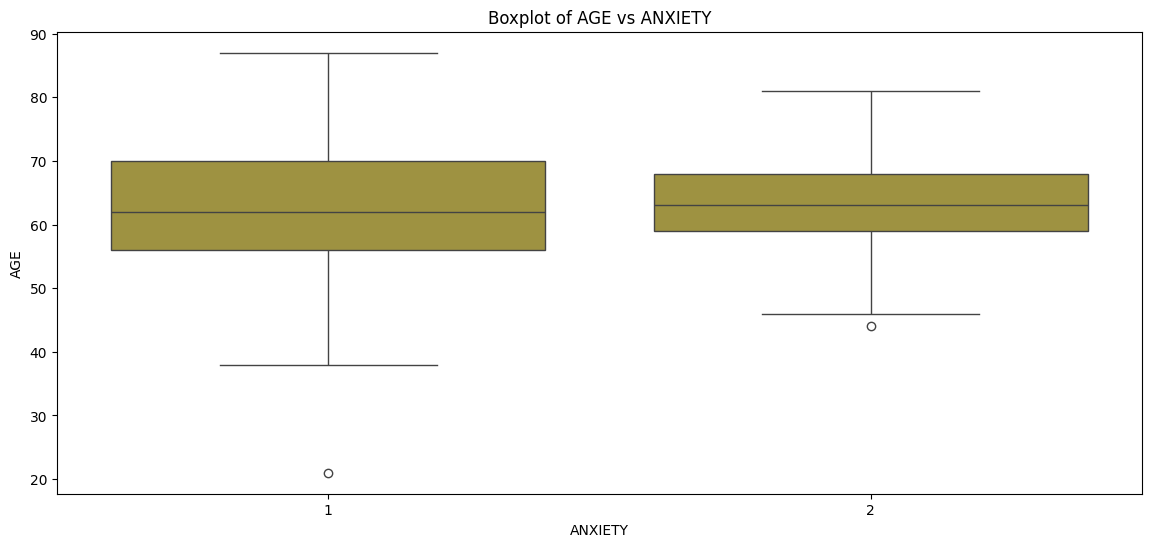

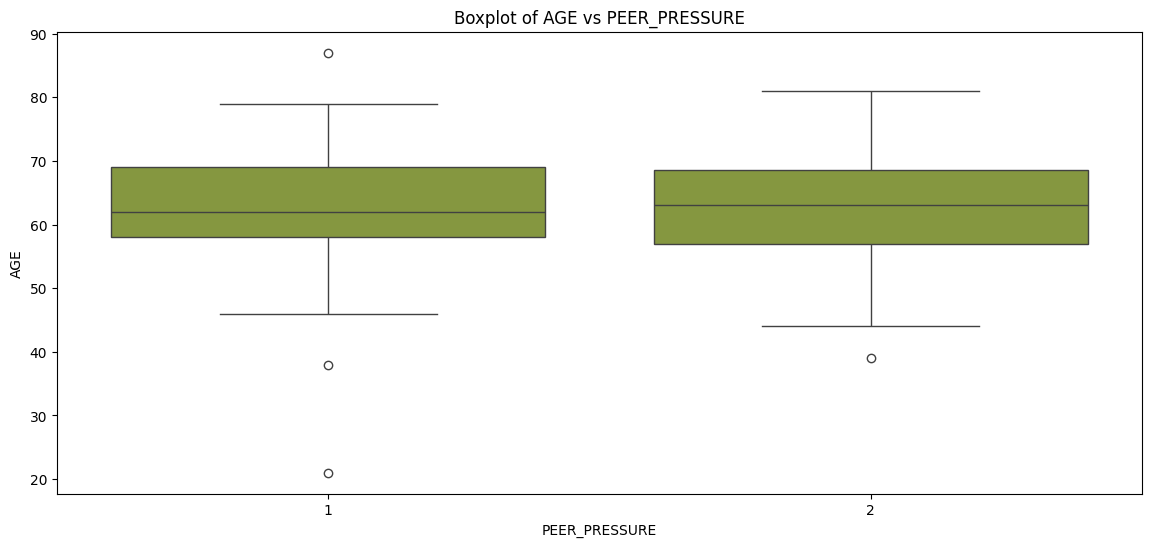

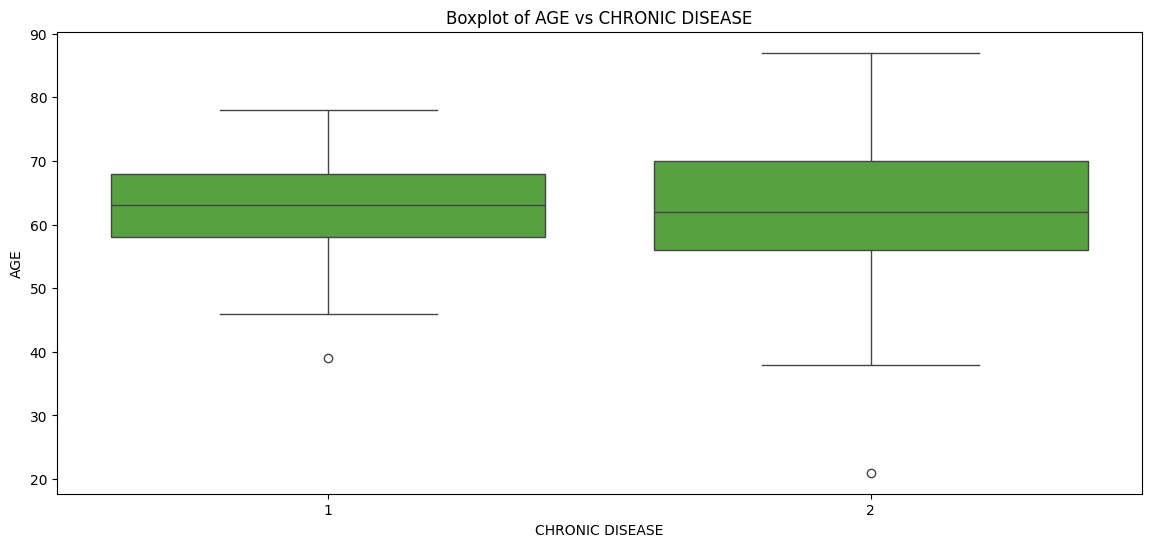

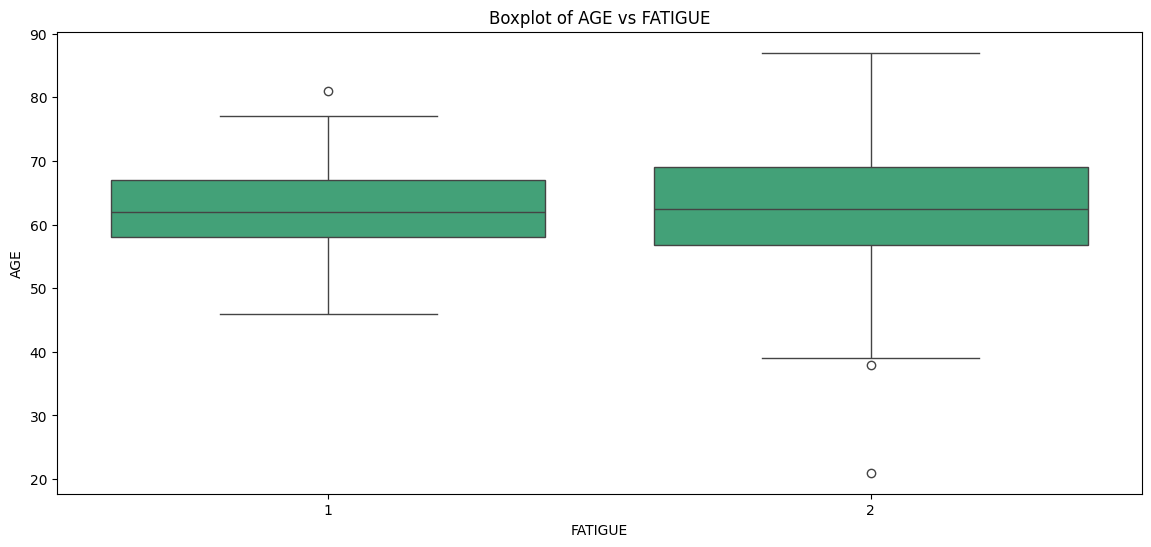

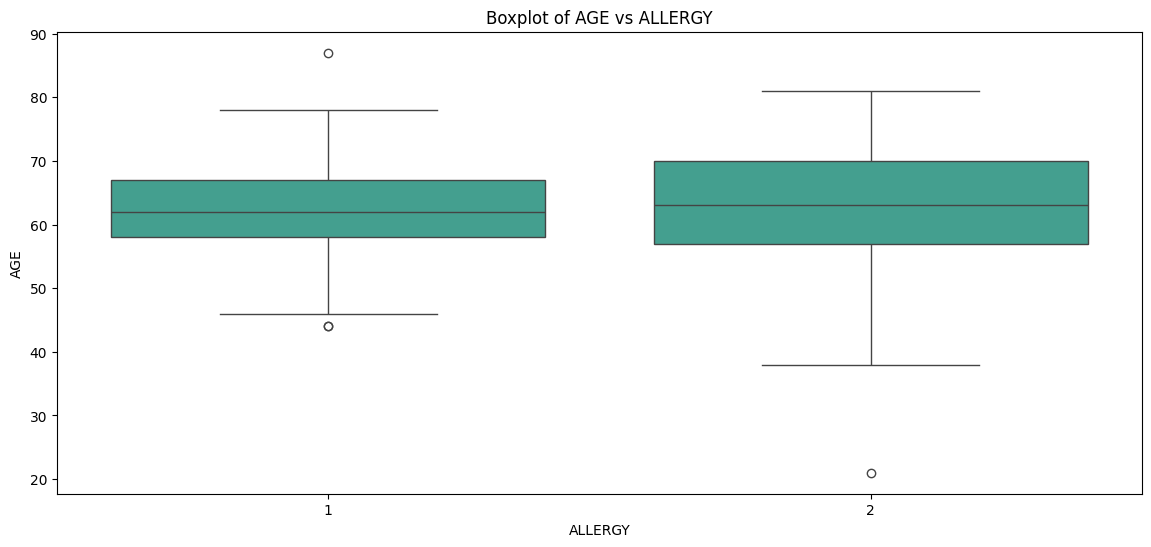

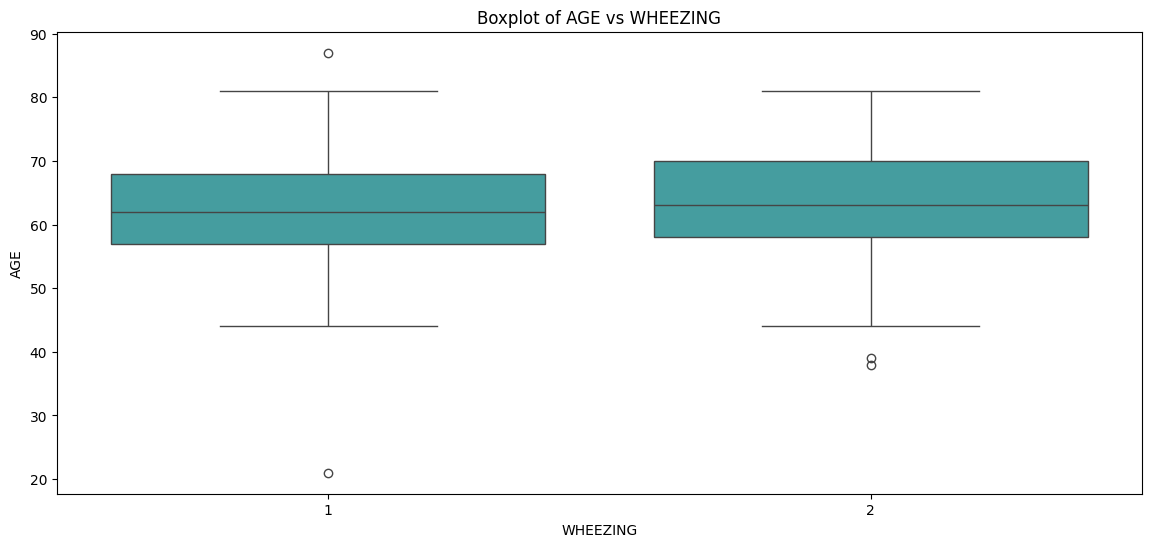

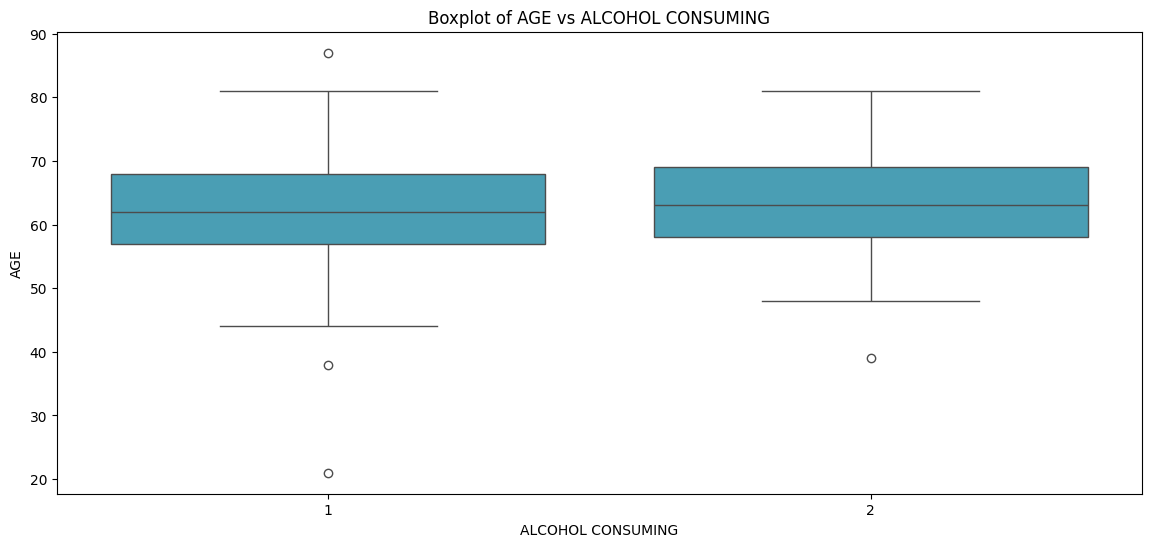

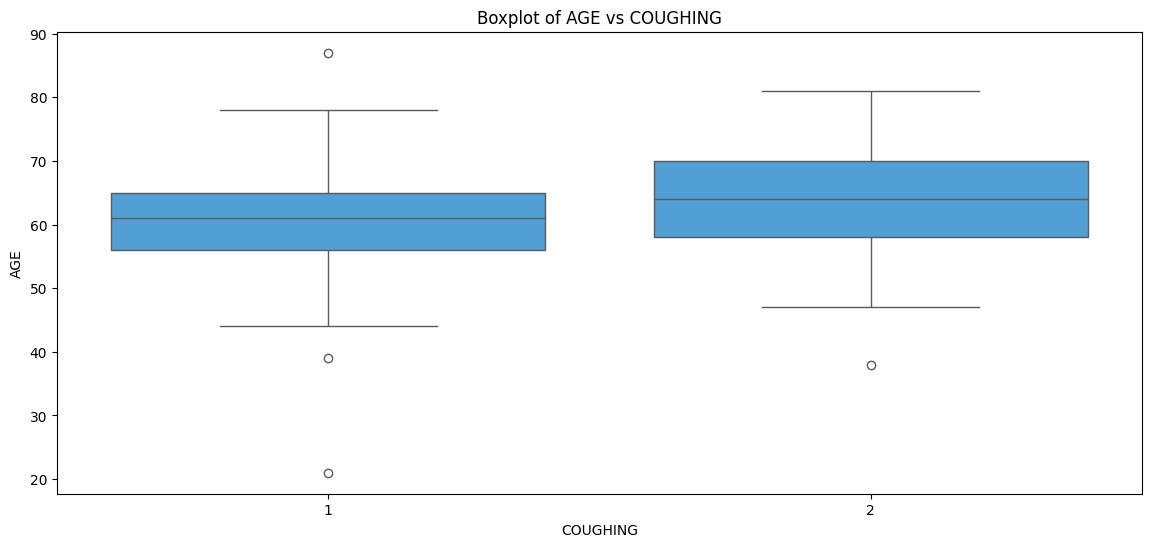

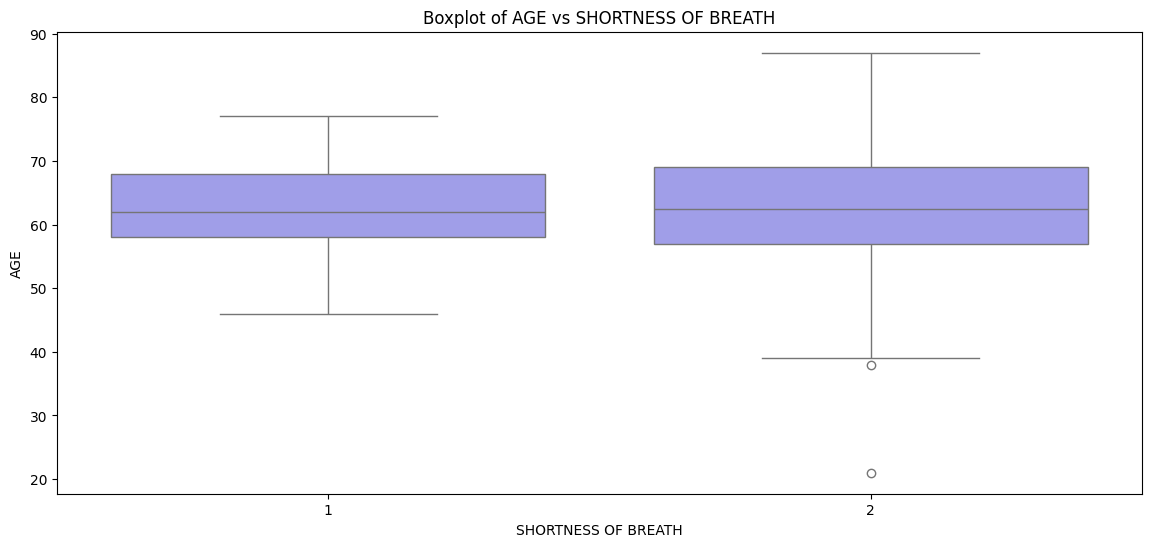

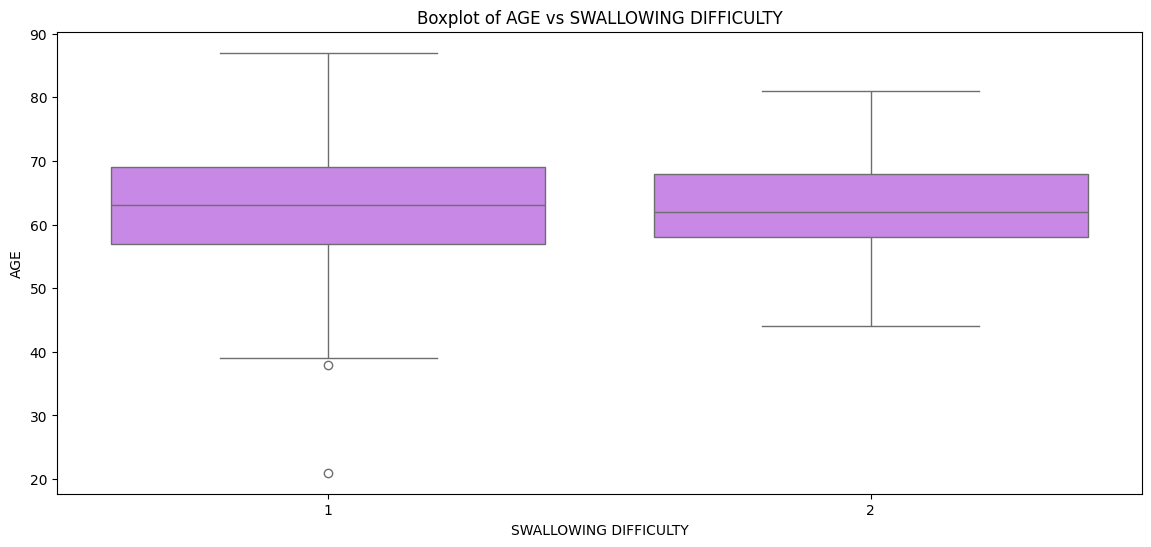

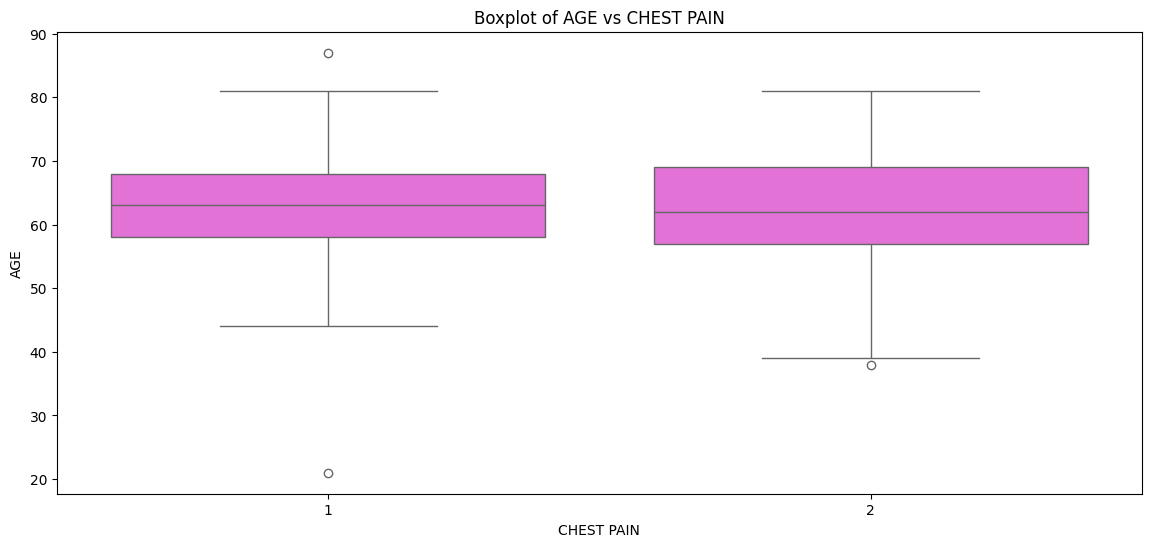

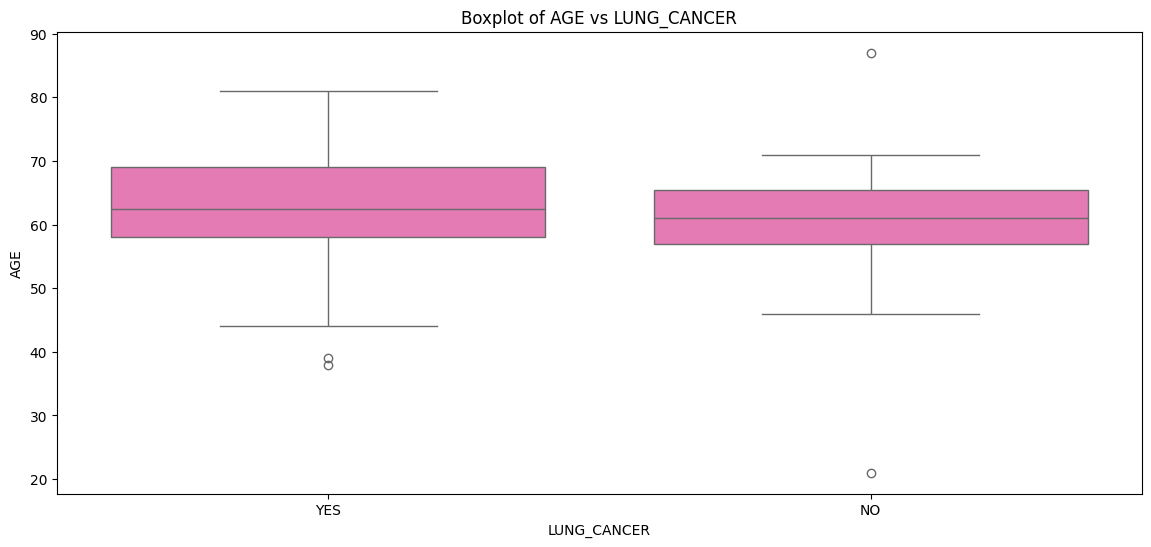

In [15]:
df.columns = df.columns.str.strip()

categorical_features = ['GENDER', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE', 
                        'CHRONIC DISEASE', 'FATIGUE', 'ALLERGY', 'WHEEZING', 
                        'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH', 
                        'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER']

palette = sns.color_palette("husl", len(categorical_features))

for i, cat_feature in enumerate(categorical_features):
    plt.figure(figsize=(14, 6))
    sns.boxplot(x=cat_feature, y='AGE', data=df, palette=[palette[i]])
    plt.title(f'Boxplot of AGE vs {cat_feature}')
    plt.show()

## Multivariate Analysis

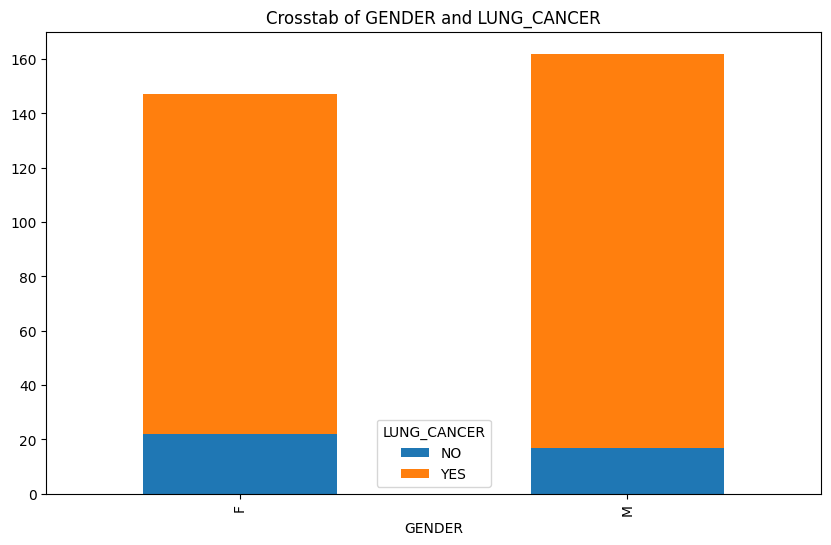

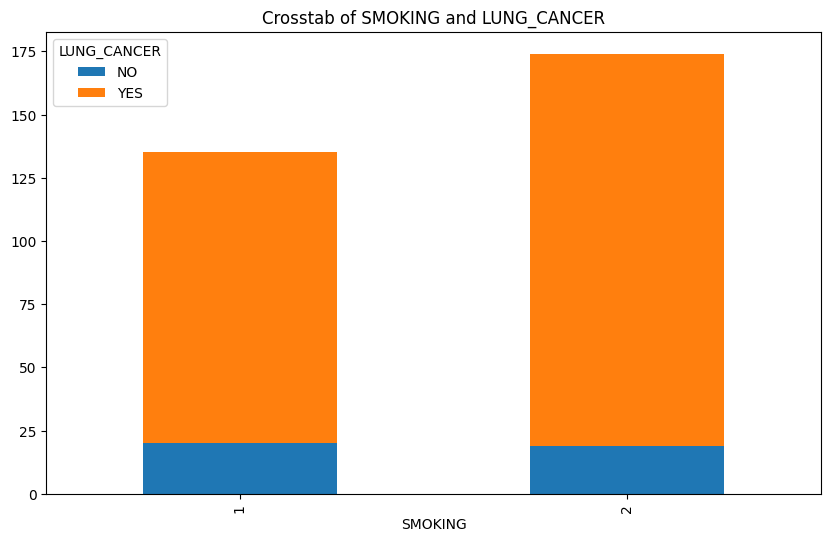

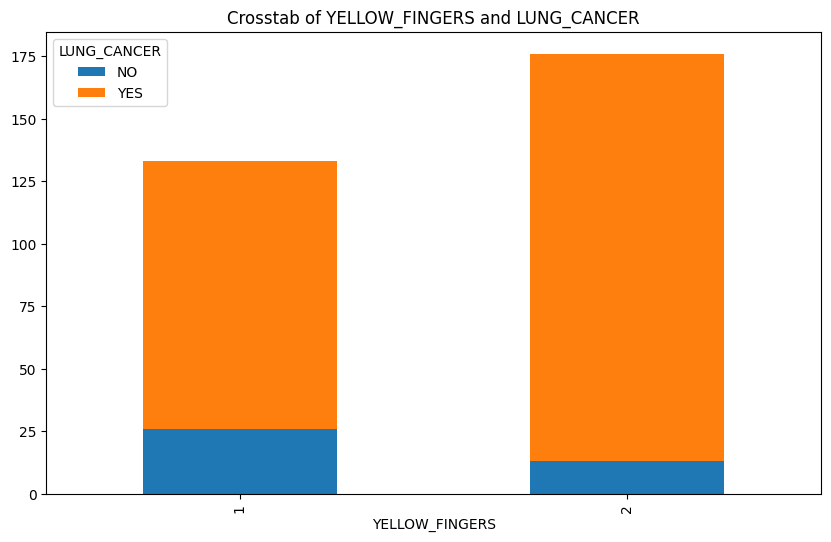

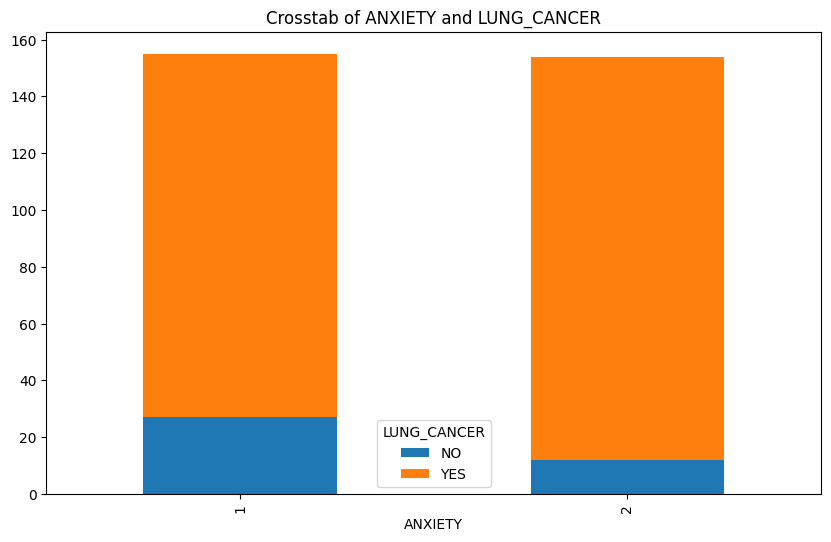

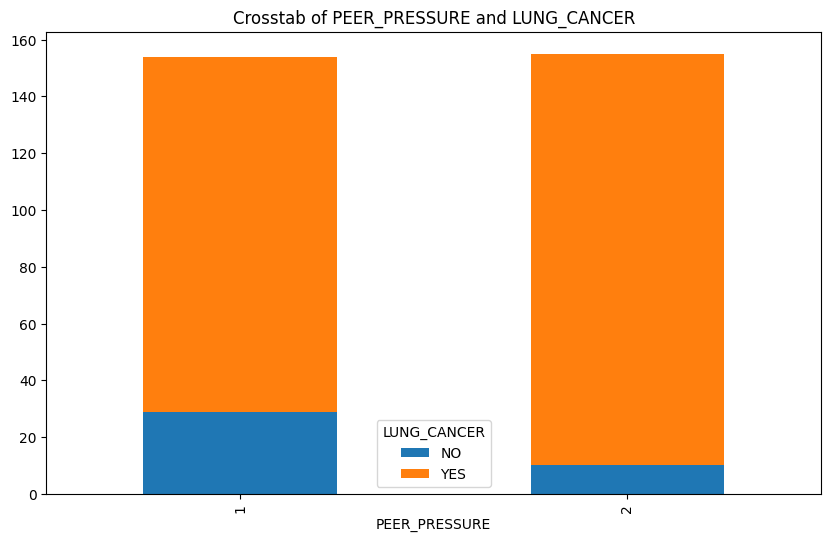

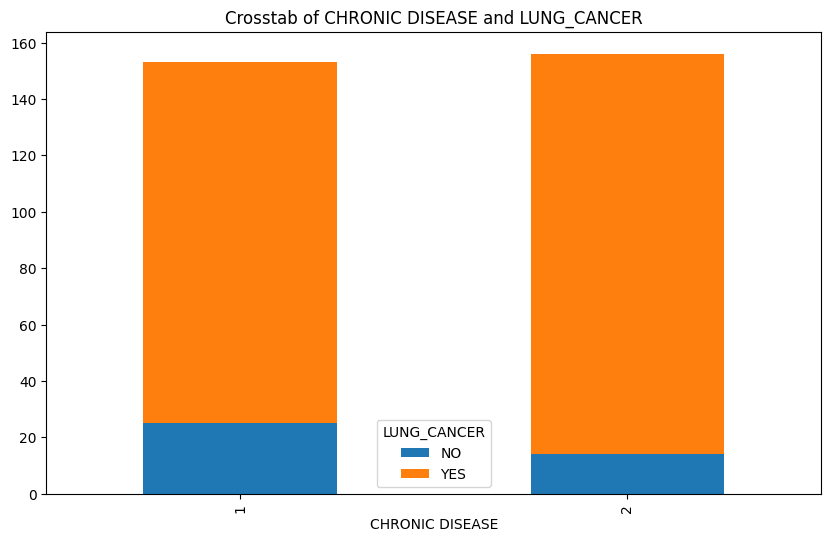

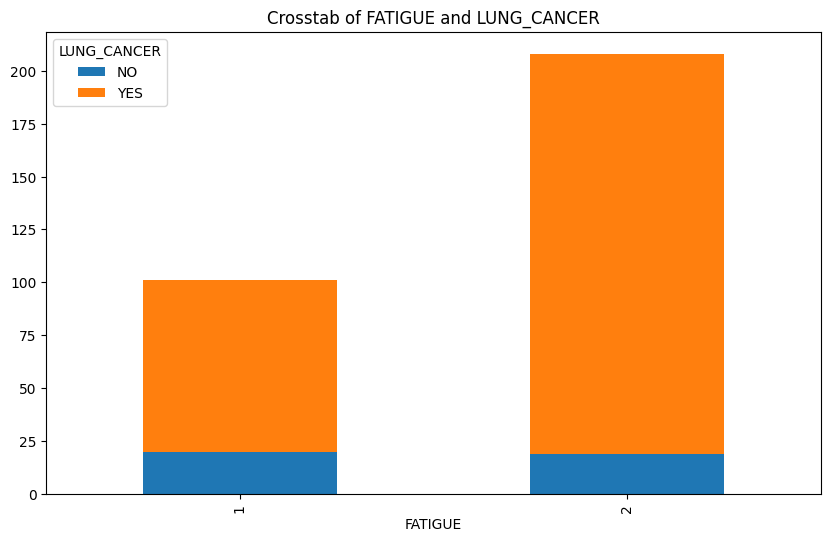

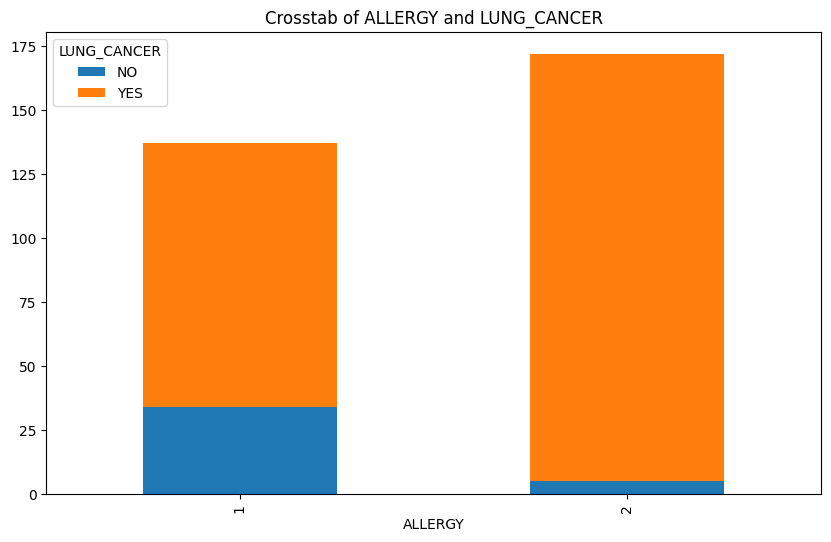

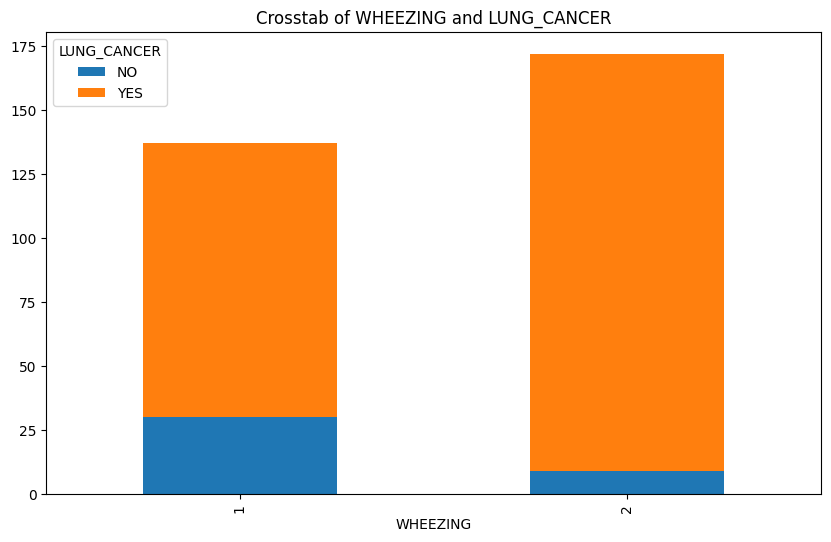

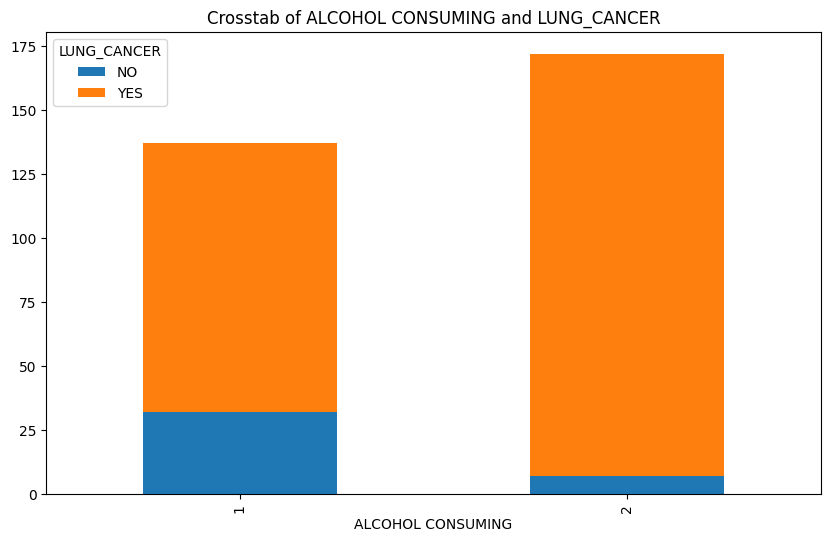

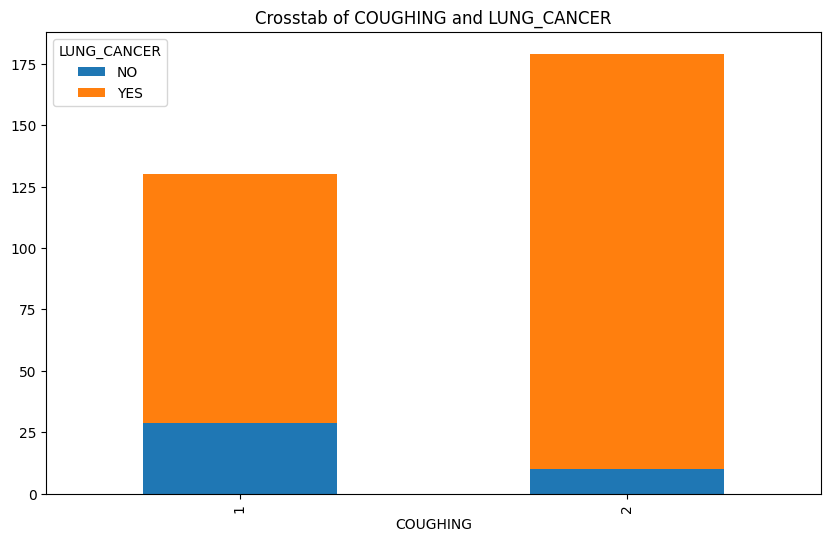

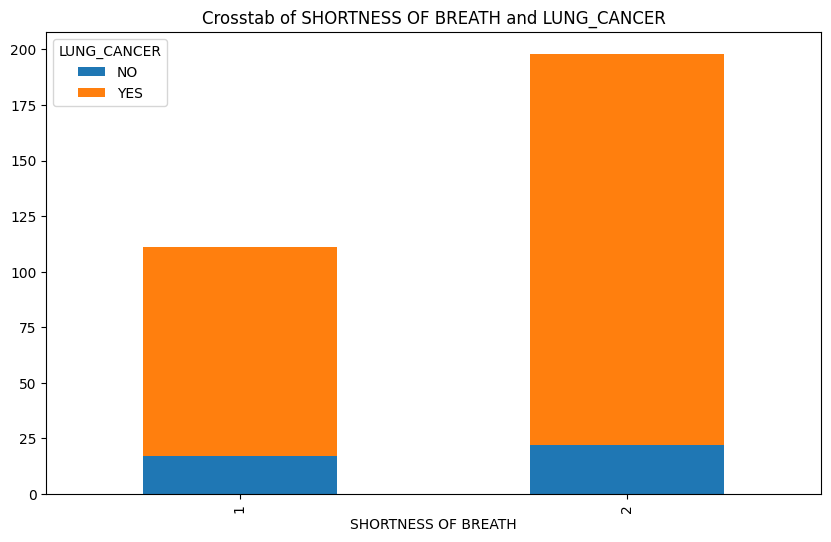

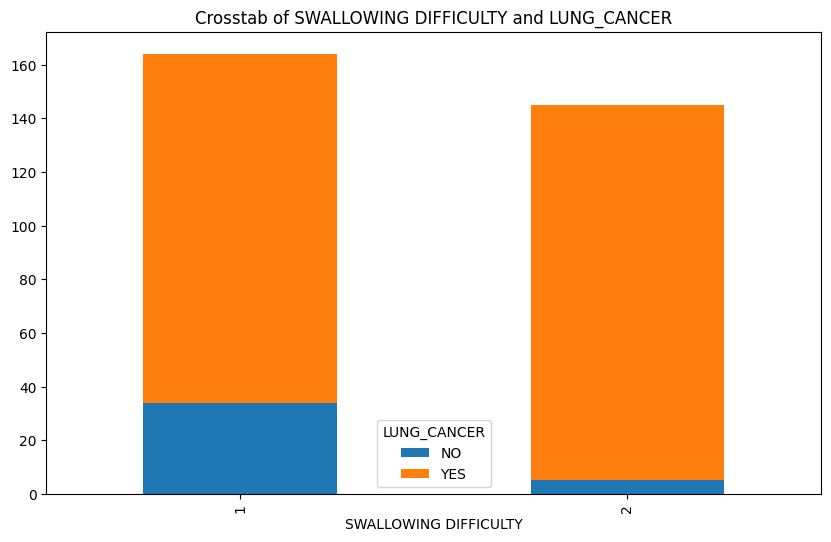

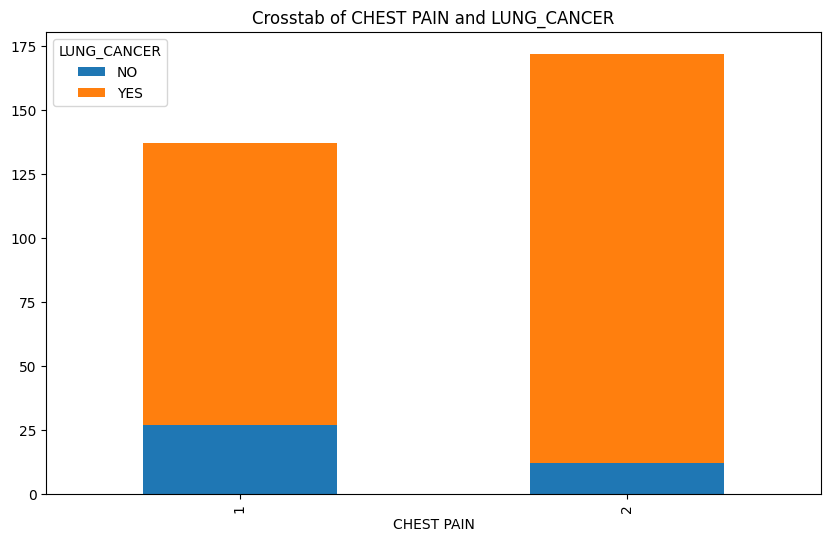

In [16]:
for cat_feature in categorical_features:
    if cat_feature != 'LUNG_CANCER':
        crosstab = pd.crosstab(df[cat_feature], df['LUNG_CANCER'])
        crosstab.plot(kind='bar', stacked=True, figsize=(10, 6))
        plt.title(f'Crosstab of {cat_feature} and LUNG_CANCER')
        plt.show()

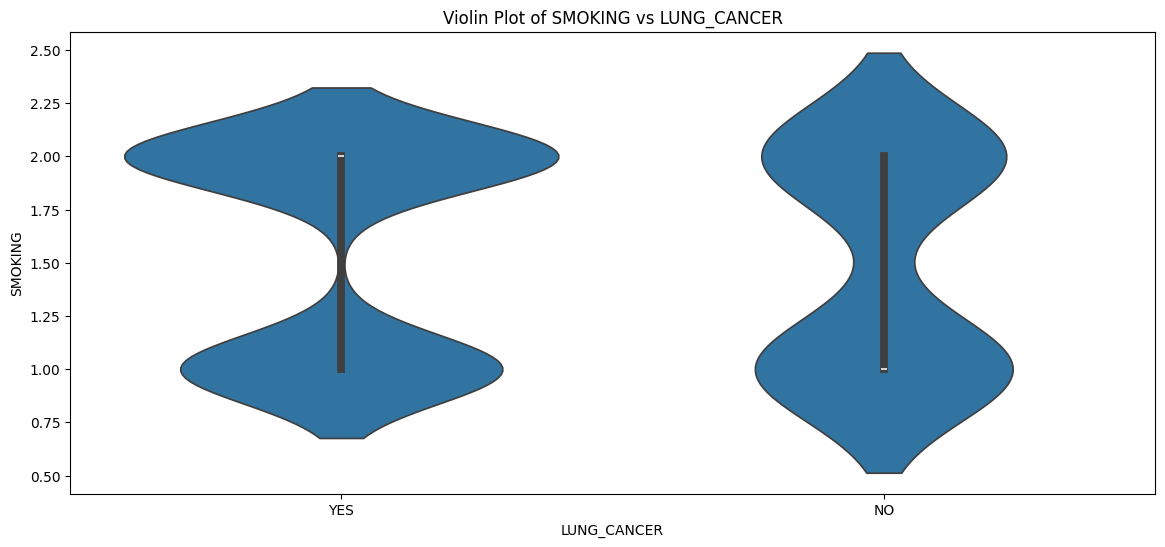

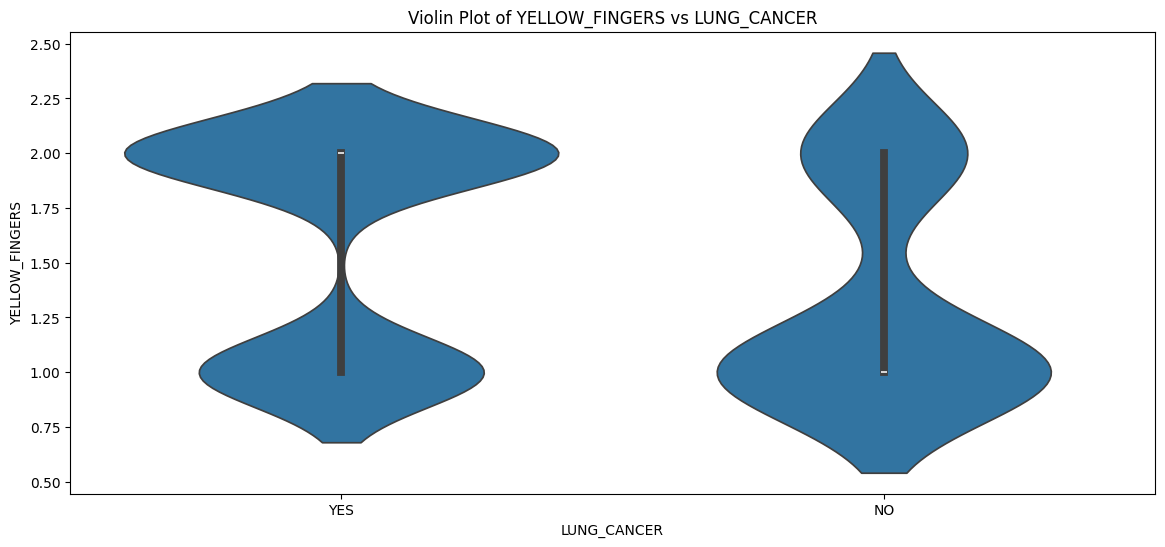

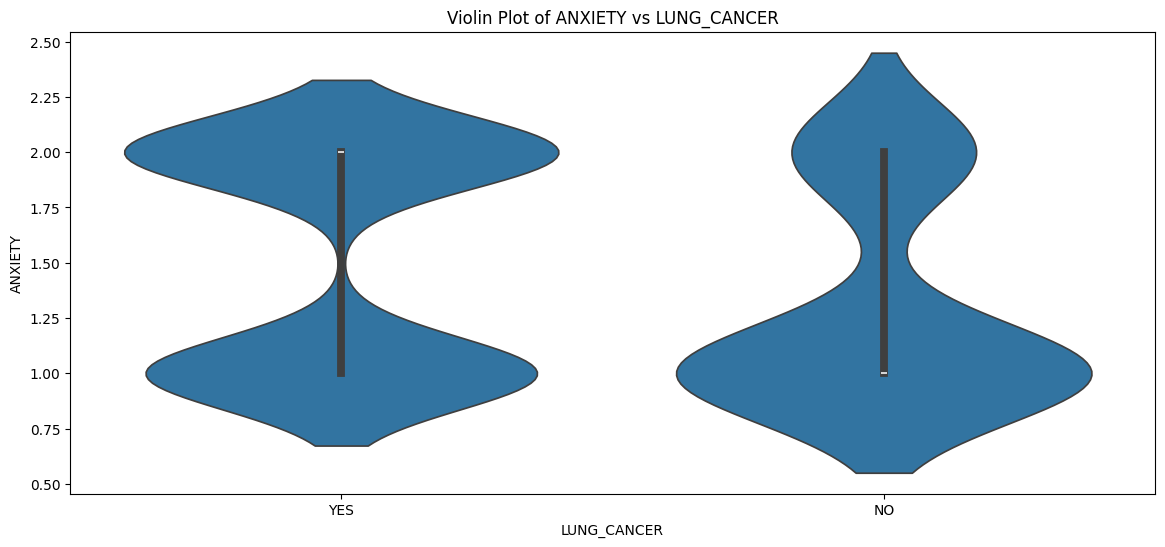

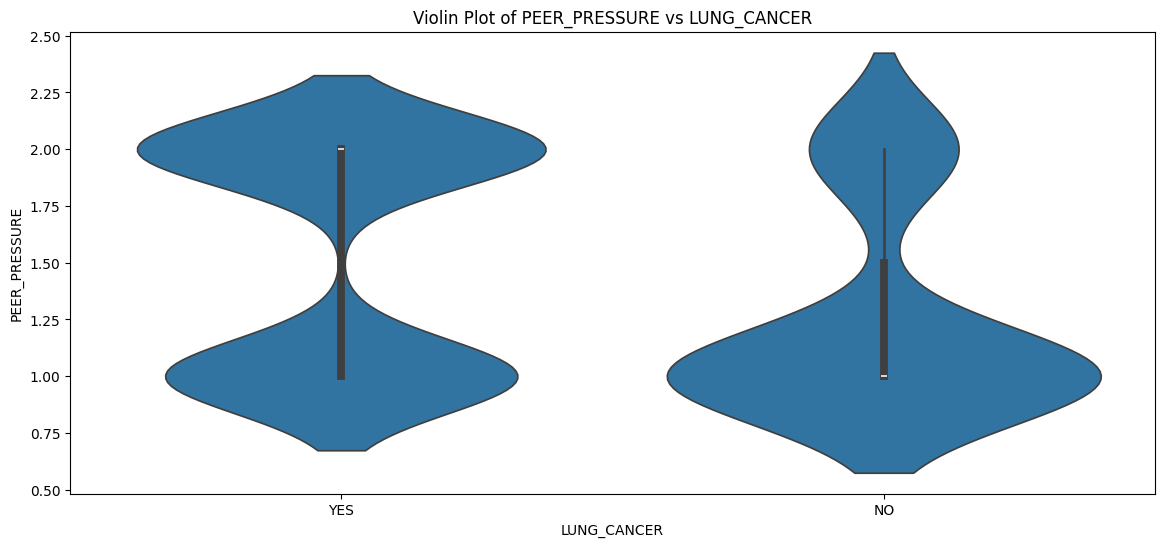

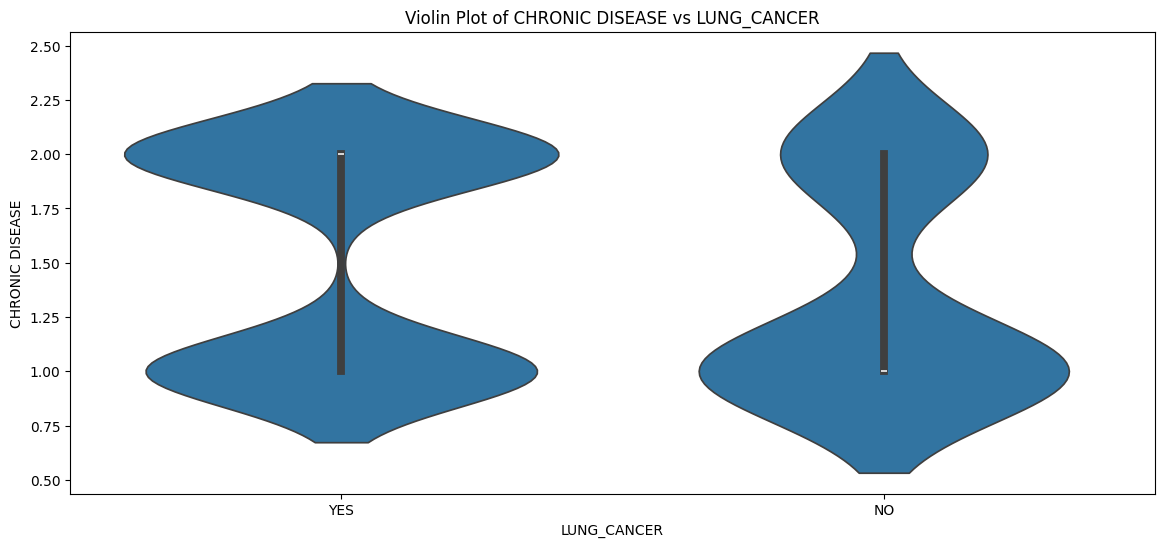

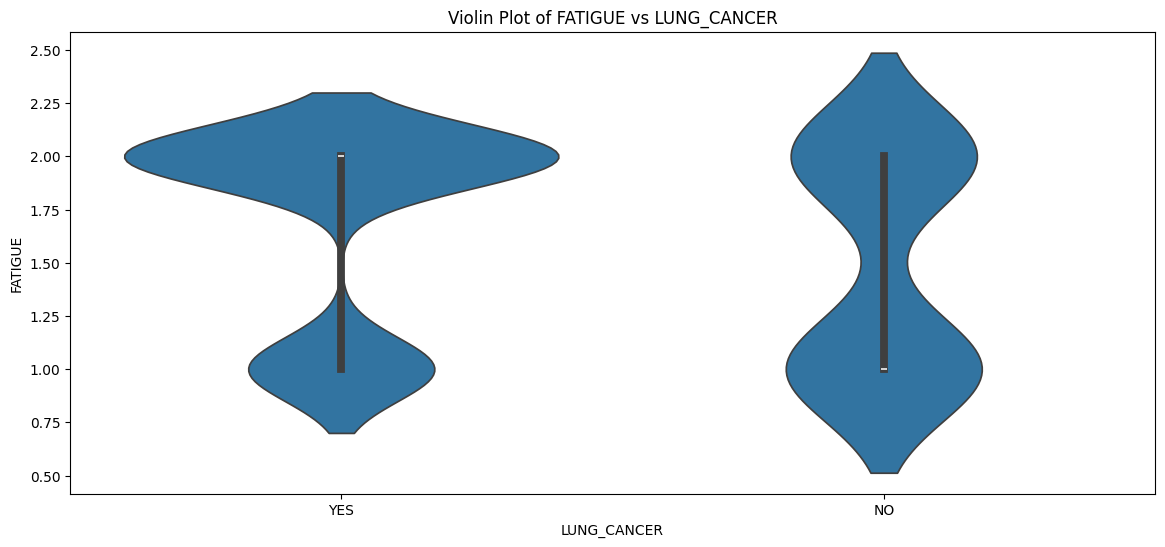

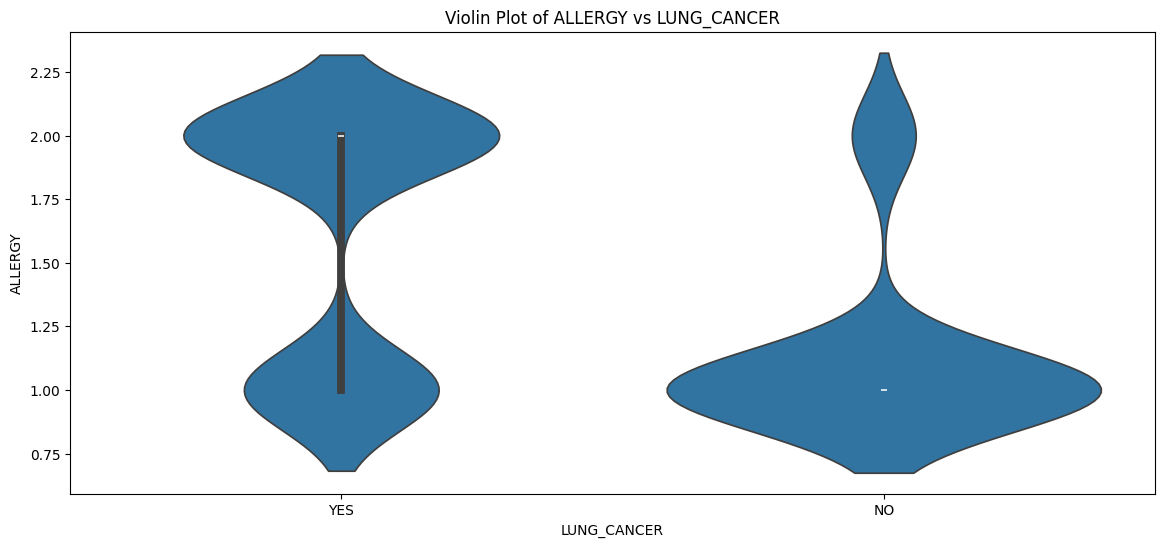

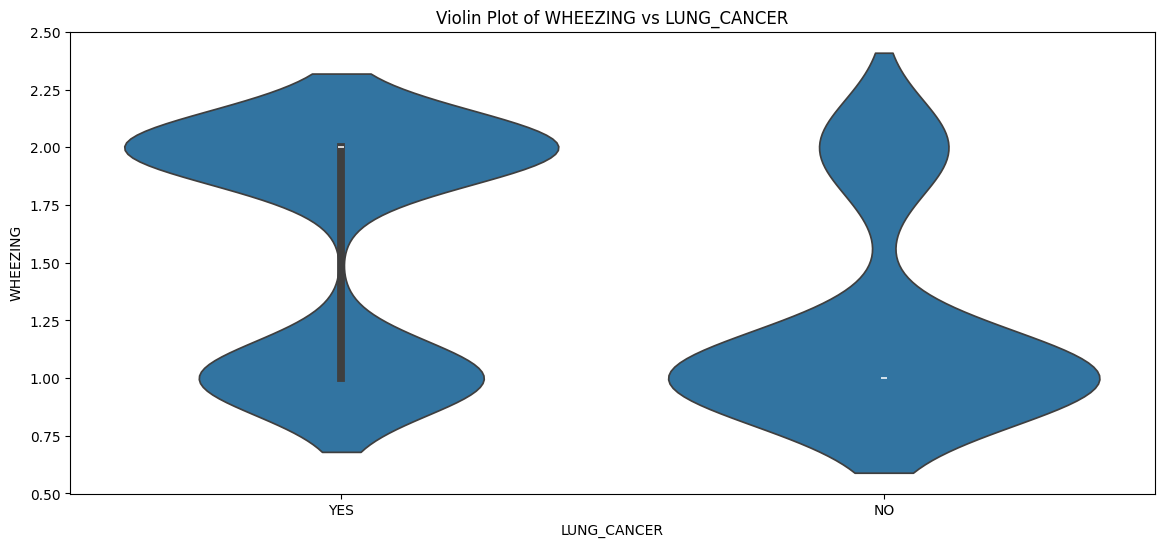

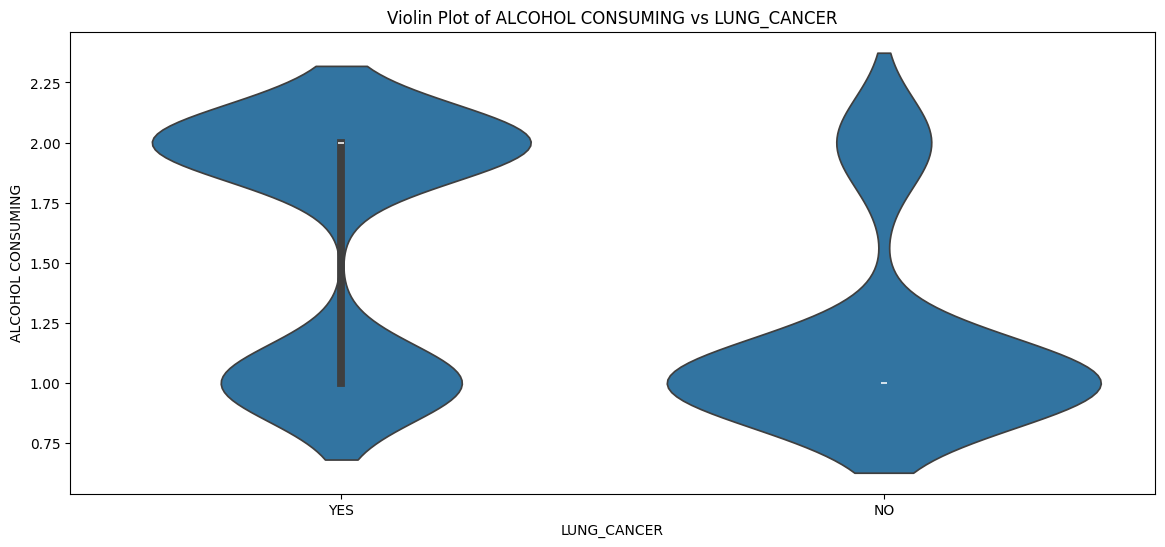

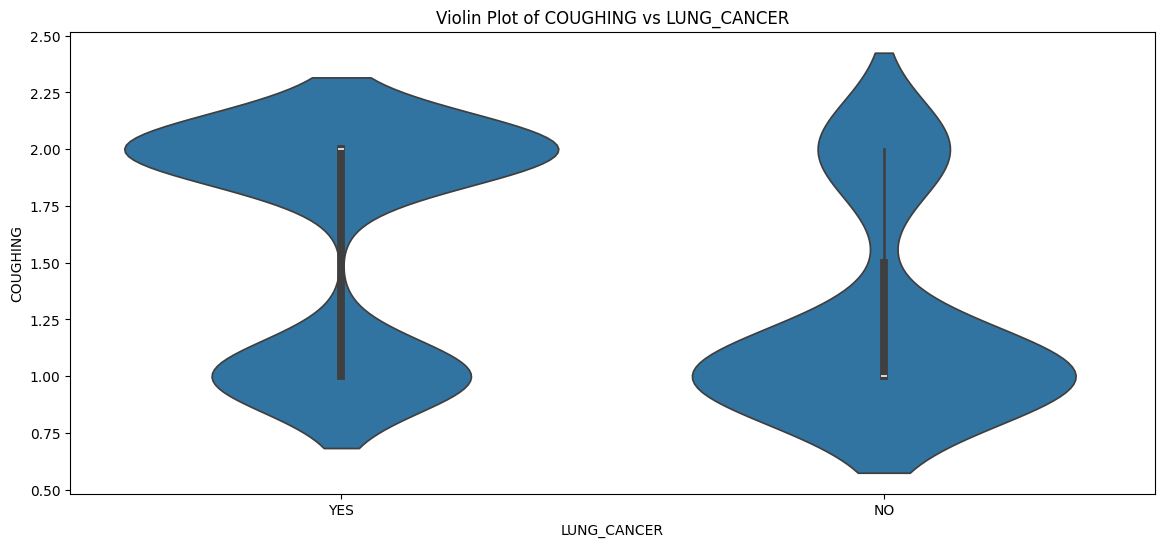

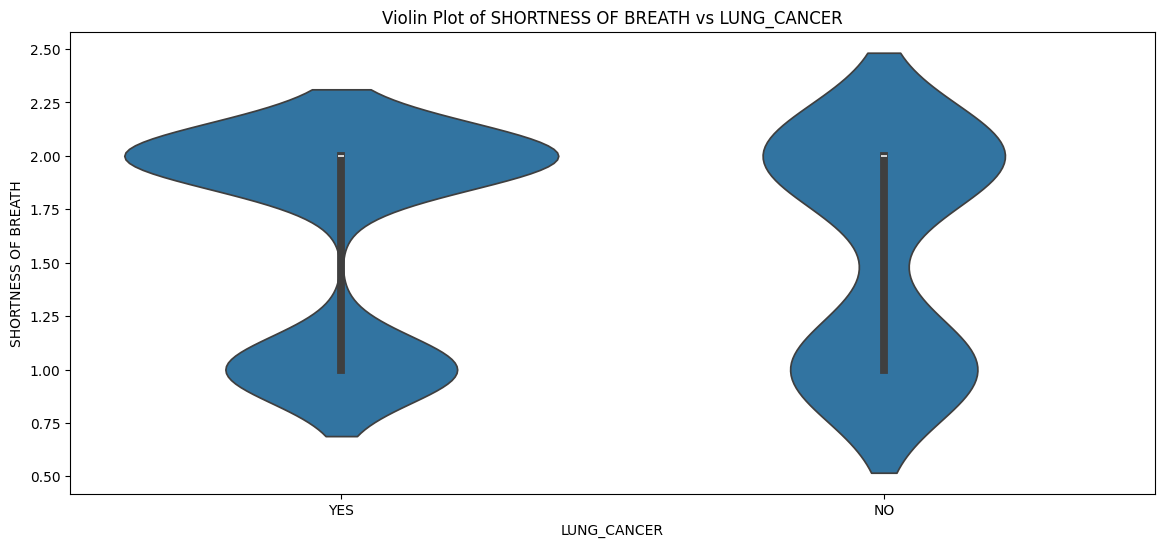

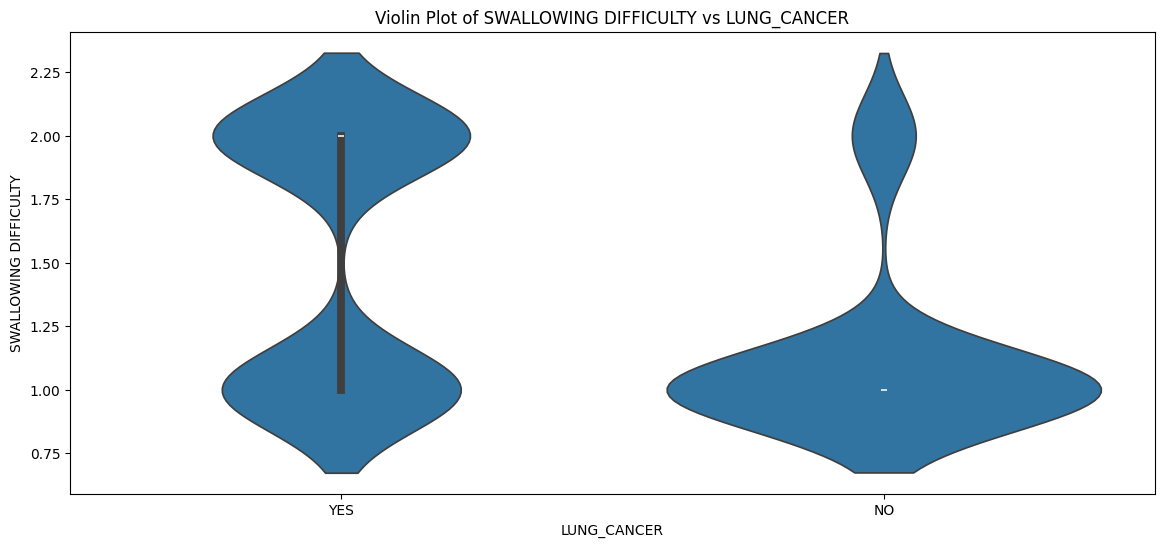

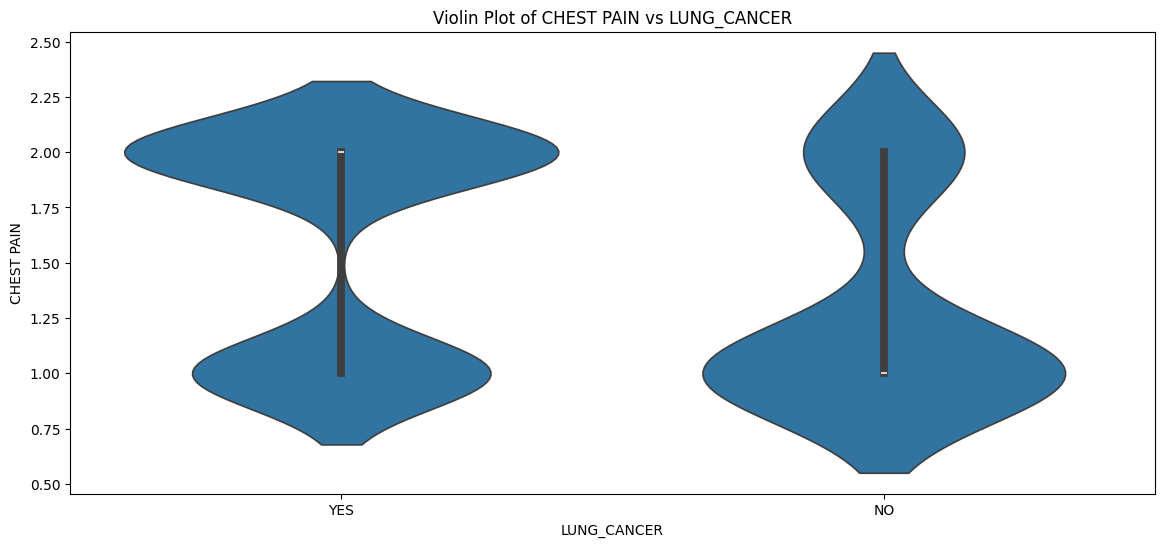

In [17]:
for feature in df.select_dtypes(include=[np.number]).columns:
    if feature != 'AGE':
        plt.figure(figsize=(14, 6))
        sns.violinplot(x='LUNG_CANCER', y=feature, data=df)
        plt.title(f'Violin Plot of {feature} vs LUNG_CANCER')
        plt.show()

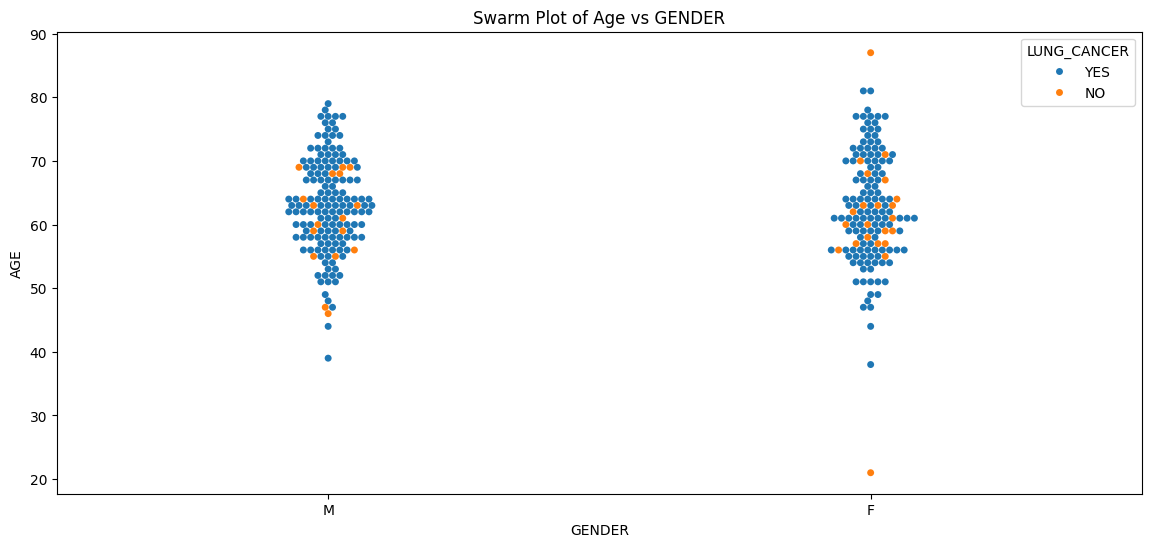

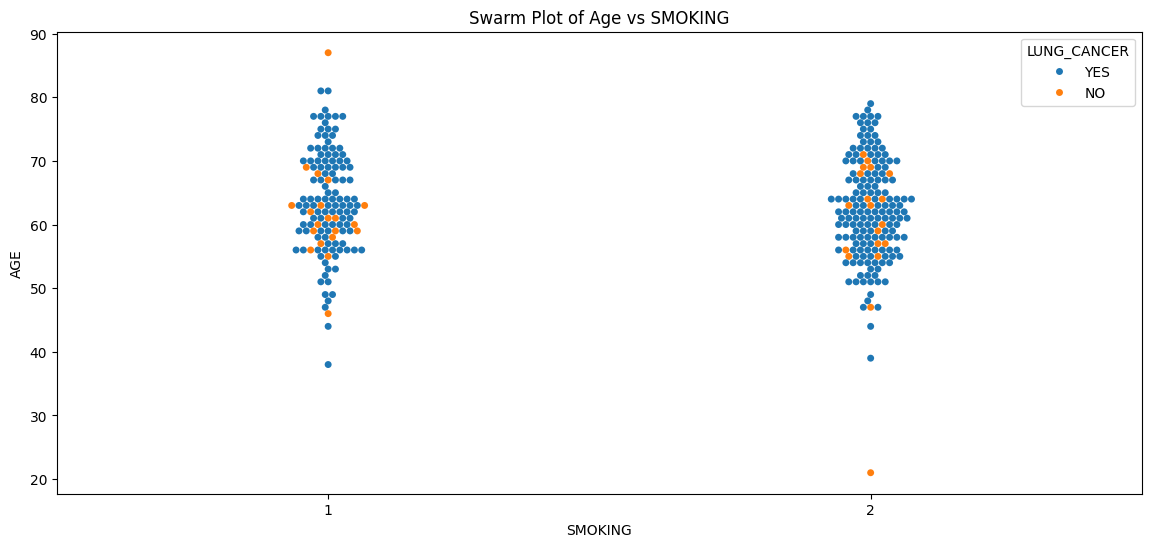

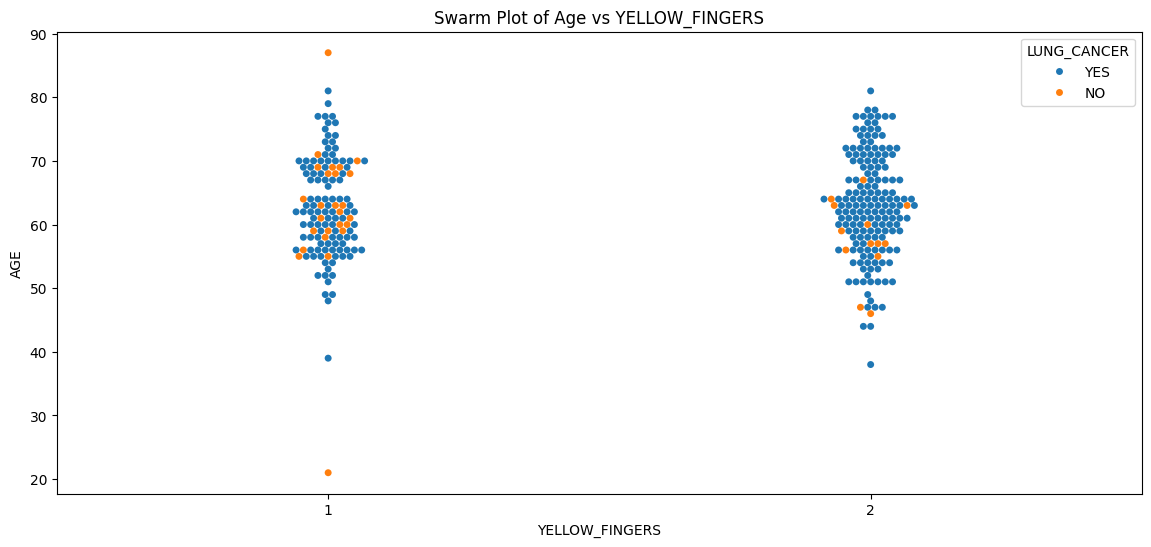

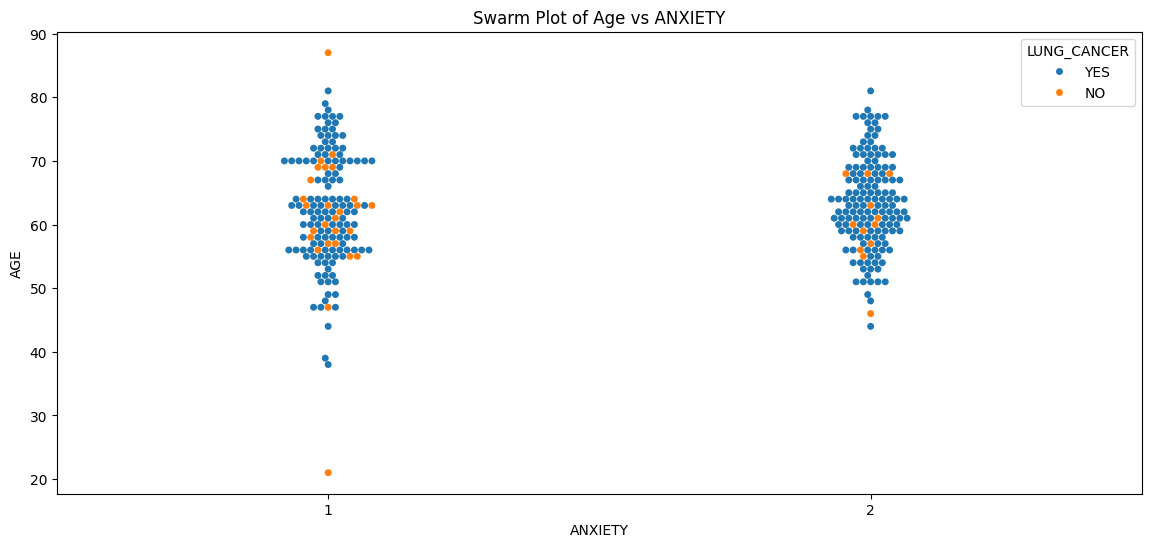

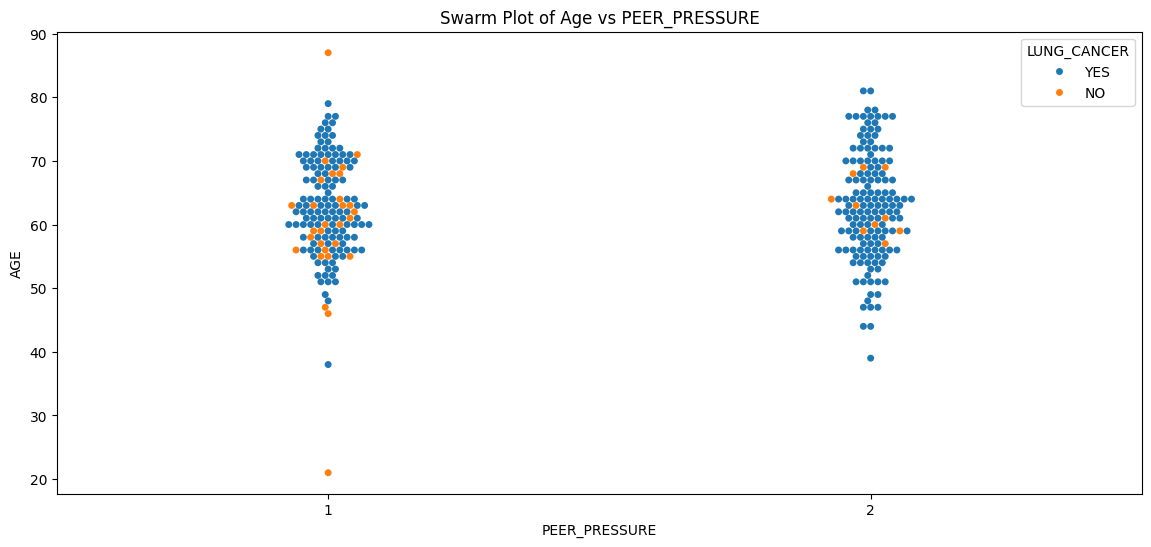

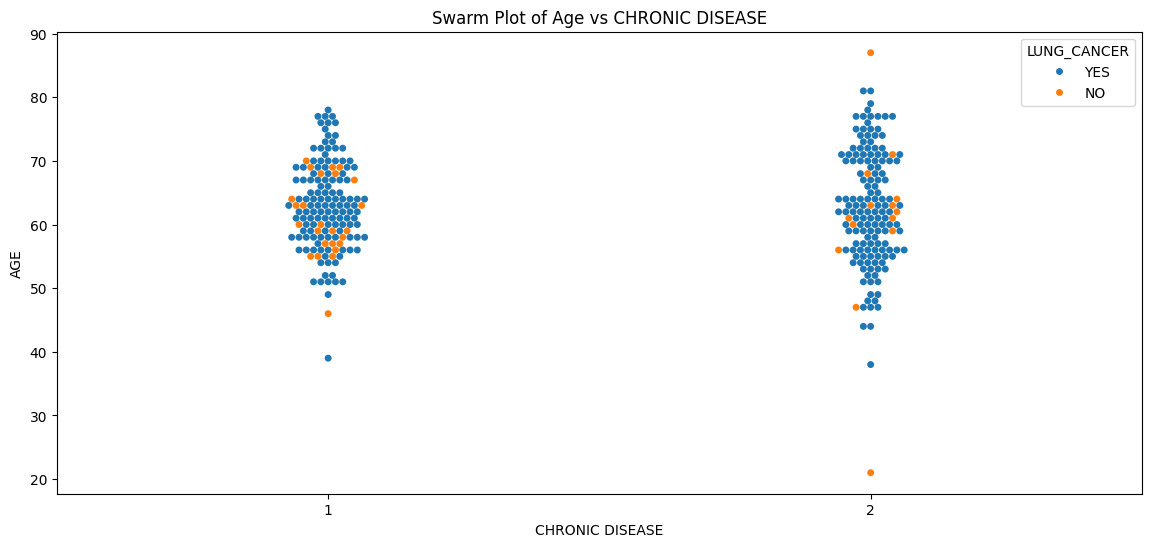

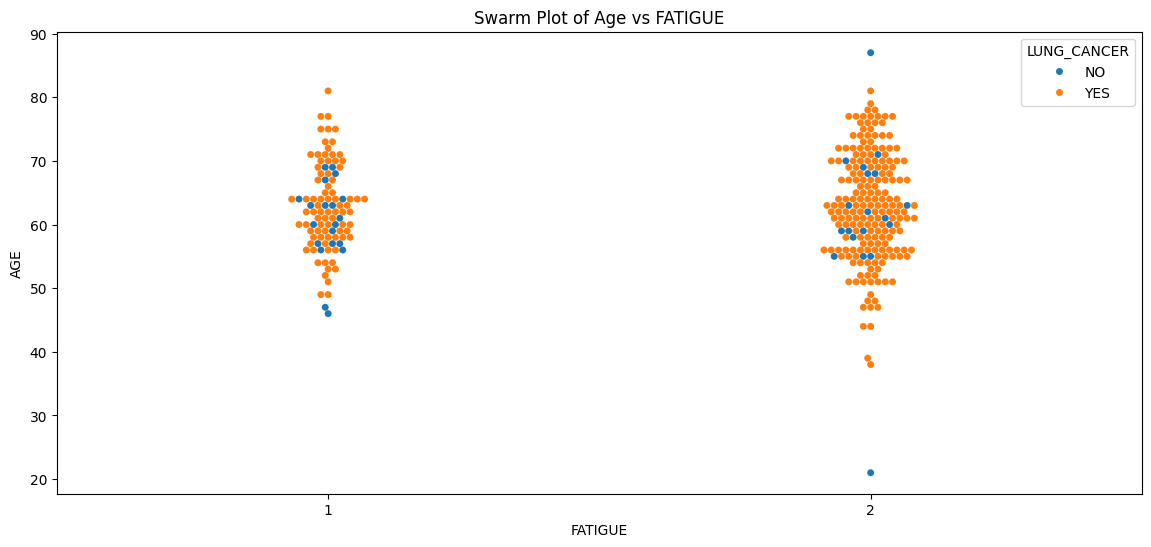

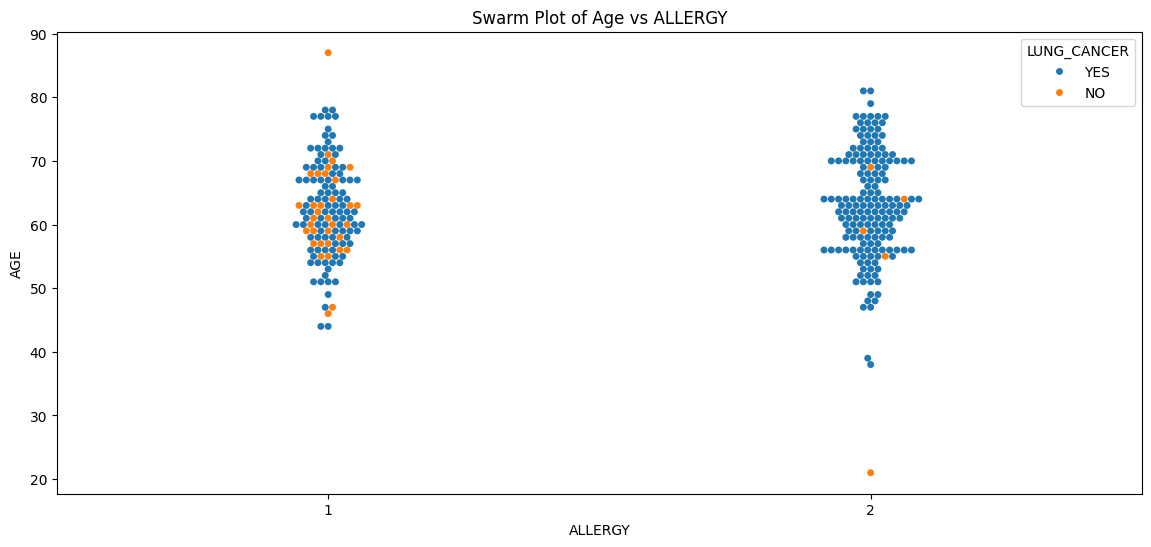

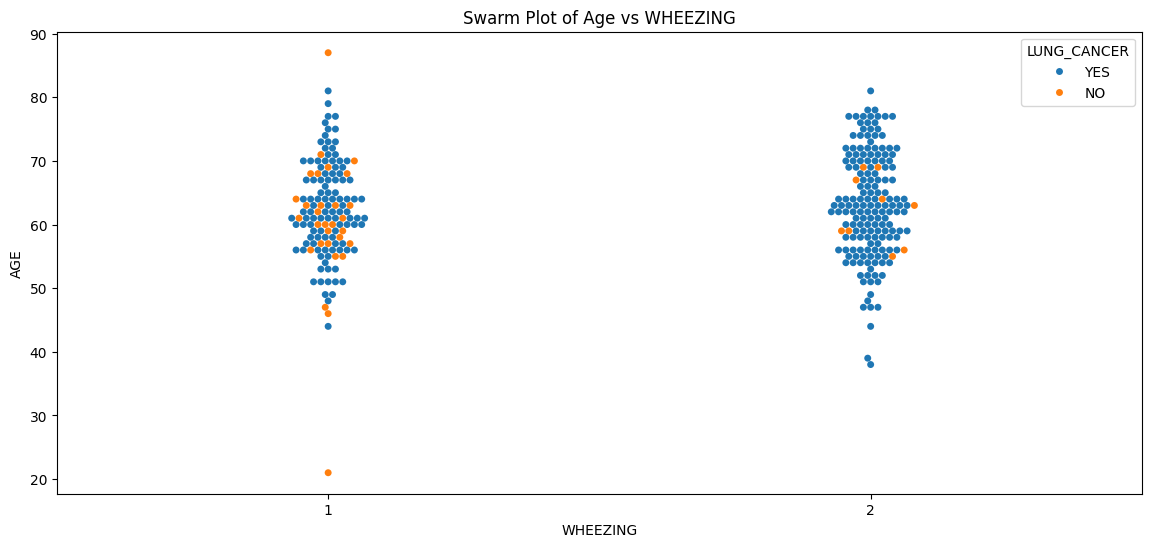

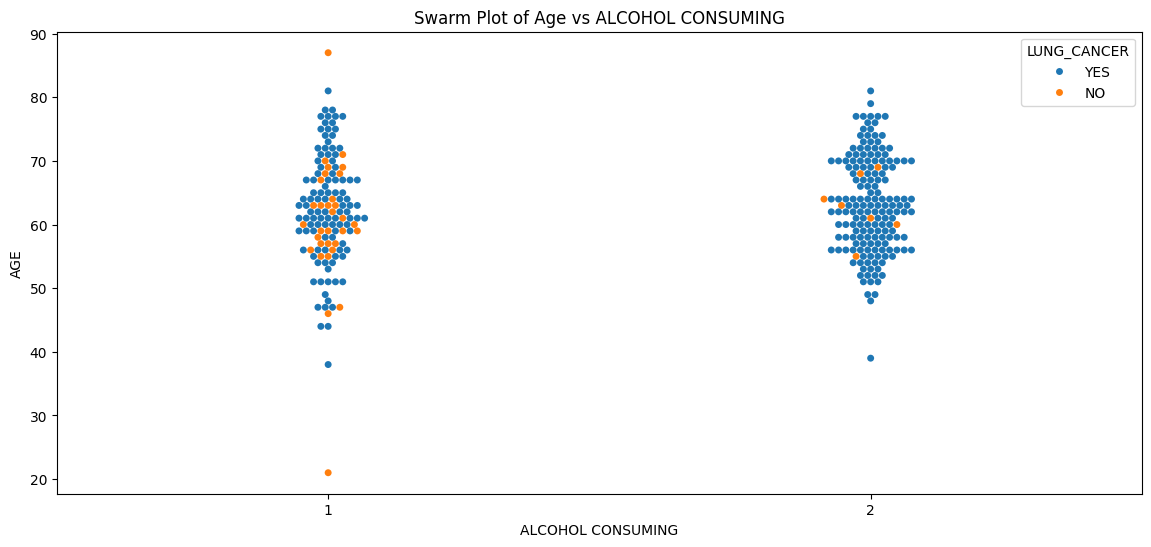

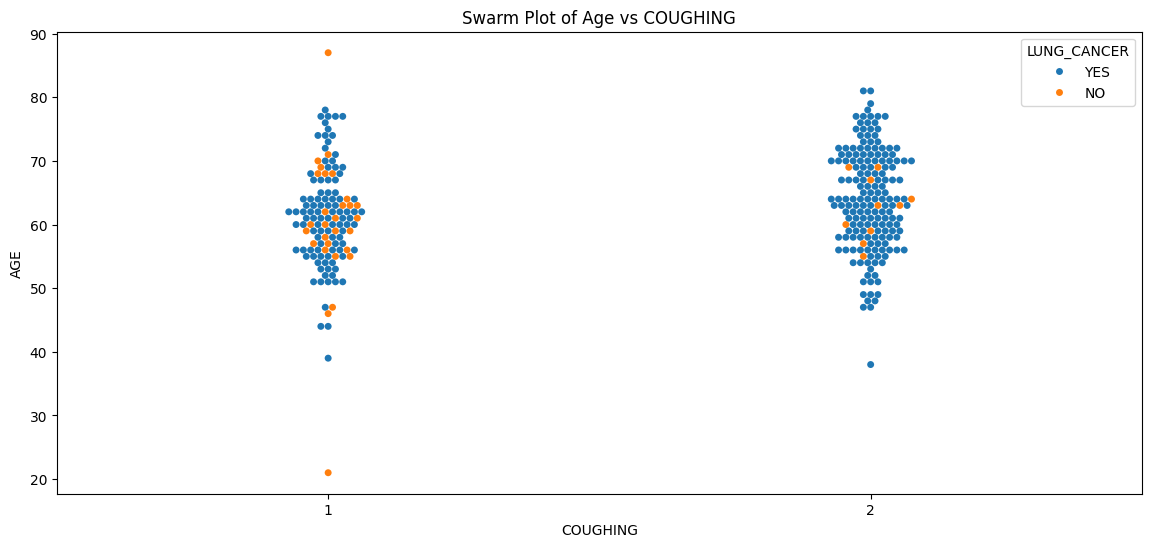

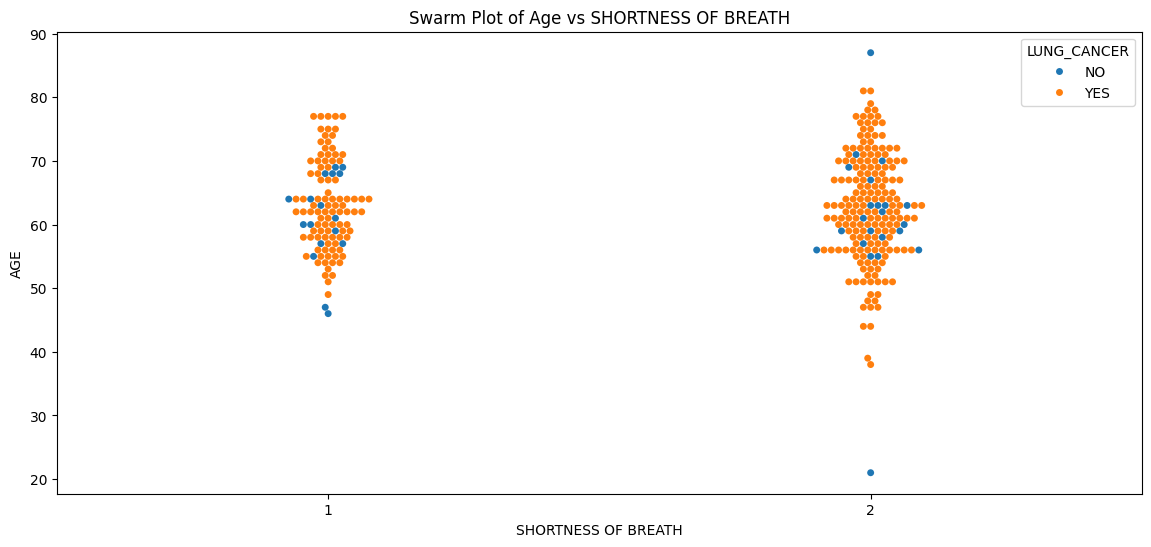

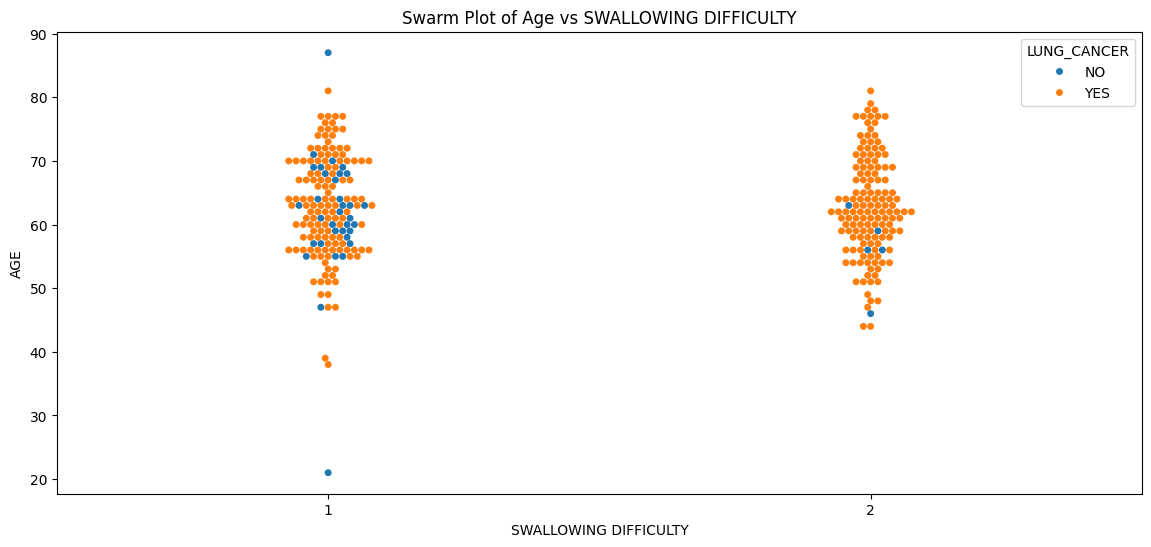

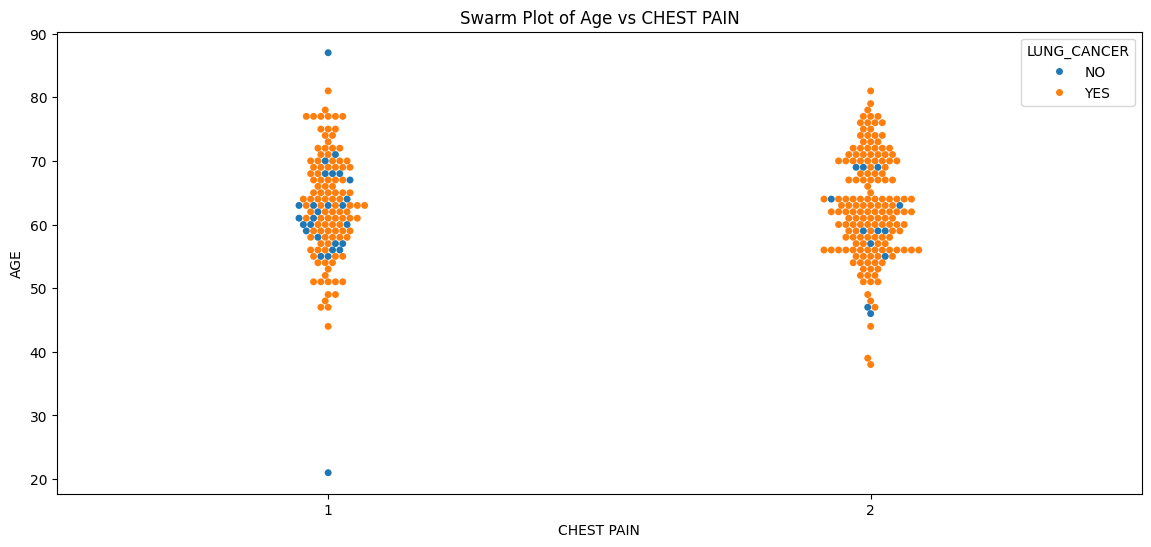

In [18]:
for cat_feature in categorical_features:
    if cat_feature != 'LUNG_CANCER':
        plt.figure(figsize=(14, 6))
        sns.swarmplot(x=cat_feature, y='AGE', hue='LUNG_CANCER',data=df)
        plt.title(f'Swarm Plot of Age vs {cat_feature}')
        plt.show()

# Models

Best Model: {'classifier': SVC(probability=True), 'classifier__C': 10, 'classifier__gamma': 'scale', 'classifier__kernel': 'rbf'}
Accuracy: 0.9355
Precision: 0.9630
Recall: 0.9630
F1 Score: 0.9630
Classification Report:
              precision    recall  f1-score   support

          NO       0.75      0.75      0.75         8
         YES       0.96      0.96      0.96        54

    accuracy                           0.94        62
   macro avg       0.86      0.86      0.86        62
weighted avg       0.94      0.94      0.94        62



<Figure size 1000x700 with 0 Axes>

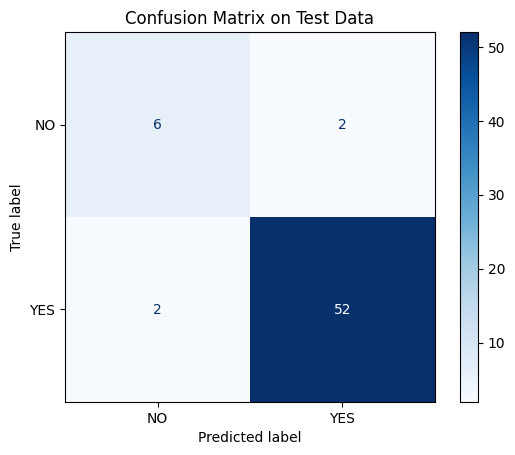

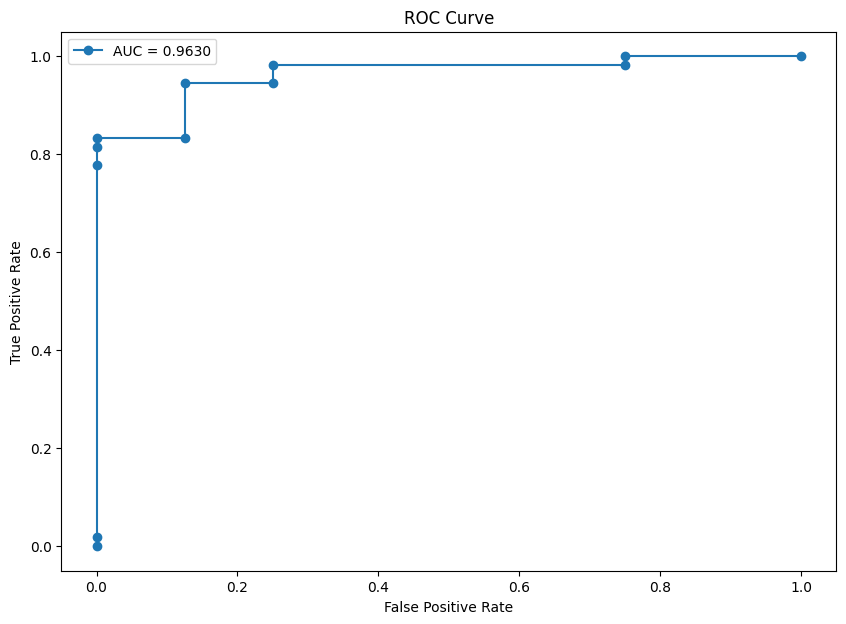

In [19]:
def train_and_evaluate_models(df):
    # Define feature and target variables
    X = df.drop('LUNG_CANCER', axis=1)
    y = df['LUNG_CANCER']

    # Encode categorical features
    label_encoders = {}
    for column in X.select_dtypes(include=['object']).columns:
        le = LabelEncoder()
        X[column] = le.fit_transform(X[column])
        label_encoders[column] = le

    # Split the data into training and test sets with stratification
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

    # Apply SMOTE to handle class imbalance in the training data
    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

    # Define the parameter grid
    param_grid = [
        {
            'classifier': [RandomForestClassifier()],
            'classifier__n_estimators': [50, 100, 200],
            'classifier__max_depth': [None, 10, 20]
        },
        {
            'classifier': [GradientBoostingClassifier()],
            'classifier__n_estimators': [50, 100, 200],
            'classifier__learning_rate': [0.01, 0.1, 1],
            'classifier__max_depth': [3, 5, 7]
        },
        {
            'classifier': [SVC(probability=True)],
            'classifier__C': [0.1, 1, 10],
            'classifier__kernel': ['linear', 'rbf'],
            'classifier__gamma': ['scale', 'auto']
        }
    ]

    # Define the pipeline with a placeholder for the classifier
    pipeline = Pipeline([
        ('classifier', RandomForestClassifier())
    ])

    # Perform GridSearchCV to find the best model and hyperparameters
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train_resampled, y_train_resampled)

    # Best model from grid search
    best_model = grid_search.best_estimator_

    # Predict using the best model on the test data
    y_test_pred = best_model.predict(X_test)

    # Compute various metrics
    accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred, pos_label='YES')
    recall = recall_score(y_test, y_test_pred, pos_label='YES')
    f1 = f1_score(y_test, y_test_pred, pos_label='YES')

    # Print metrics
    print(f'Best Model: {grid_search.best_params_}')
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')

    # Classification report
    report = classification_report(y_test, y_test_pred, target_names=['NO', 'YES'])
    print('Classification Report:')
    print(report)

    # Compute and plot the confusion matrix
    cm_test = confusion_matrix(y_test, y_test_pred, labels=best_model.classes_)
    plt.figure(figsize=(10, 7))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=best_model.classes_)
    disp.plot(cmap='Blues')
    plt.title('Confusion Matrix on Test Data')
    plt.show()

    # Compute and plot the ROC curve and AUC
    y_prob = best_model.predict_proba(X_test)[:, 1]  # Probability estimates for the positive class
    fpr, tpr, thresholds = roc_curve(y_test, y_prob, pos_label='YES')
    auc_score = roc_auc_score(y_test, y_prob)

    plt.figure(figsize=(10, 7))
    plt.plot(fpr, tpr, marker='o', label=f'AUC = {auc_score:.4f}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()

# Usage
train_and_evaluate_models(df)

In [20]:
def adjust_threshold(model, X_test, y_test, threshold=0.5):
    # predict probabilities
    y_prob = model.predict_proba(X_test)[:, 1]
    
    # threshold
    y_pred = (y_prob >= threshold).astype(int)
    
    # compute metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, pos_label=1)
    recall = recall_score(y_test, y_pred, pos_label=1)
    f1 = f1_score(y_test, y_pred, pos_label=1)
    
    print(f"Threshold: {threshold}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

def find_optimal_threshold(model, X_test, y_test):
    
    y_prob = model.predict_proba(X_test)[:, 1]
    
    # compute precision-recall curve
    precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
    
    # calculate F1 scores for each threshold
    f1_scores = 2 * (precision * recall) / (precision + recall)
    
    # find the threshold with the maximum F1 score
    optimal_idx = np.argmax(f1_scores)
    optimal_threshold = thresholds[optimal_idx]
    
    print(f"Optimal Threshold: {optimal_threshold:.4f}")
    return optimal_threshold



from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = SVC(C=10, kernel='rbf', probability=True, random_state=0)
model.fit(X_train, y_train)

optimal_threshold = find_optimal_threshold(model, X_test, y_test)
adjust_threshold(model, X_test, y_test, threshold=optimal_threshold)

Optimal Threshold: 0.2604
Threshold: 0.26042789249926074
Accuracy: 0.9550
Precision: 0.9455
Recall: 0.9720
F1 Score: 0.9585
